
# Prediction of CO2 Emissions in Four-Wheeled Vehicles with Random Forest


#### Tim : Tim Bebasdehhh
#### Anggota :
####*   Bagas Dwi Santosa (Ketua)
####*   Nurul Fatimah
####*   Dela Oktaviana

#### Pembimbing : Muhammad Habibi, S.Kom., M.Cs
#### Universitas : Universitas Jenderal Achmad Yani Yogyakarta


## Table of Contents
- [Introduction](#intro)
- [Understanding the Data](#Un)
- [Data Preprocessing](#Prep)
- [Data Exploration](#Dx)
- [Creating train and test dataset](#Split)
- [Model Development](#Model)
- [Evaluation Model](#Eval)
- [Prediction with new data Test](#Predict)
- [Conclusion](#cc)

<a id='intro'></a>
## Introduction

Di notebook ini, kami  menggunakan scikit-learn untuk mengimplementasikan Random Forest. Data terkait konsumsi bahan bakar dan emisi karbon dioksida mobil yang terdapat data train dan tes. Kemudian, kami mengolah dan membersihkan data. Selanjutnya membuat model dan mengevaluasi model menggunakan data train, dan terakhir menggunakan model untuk memprediksi dengan menggunakan data test.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

<a id='Un'></a>
## Understanding the Data

`train.csv`:
Dataset ini berisi Column sebagai berikut:

- **ID** e.g. 1
- **MAKE** e.g. Mitsu
- **VEHICLE CLASS** e.g. SUV-SMALL
- **ENGINE SIZE** e.g. 4.0
- **CYLINDERS** e.g 6.0
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. X
- **FUEL CONSUMPTION CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/EmisiCO2/train.csv')
df.head(5)

Id     Make         Vehicle Class Engine Size(L) Cylinders Transmission  \
0   1    MITSU           SUV - SMALL            1.5       4.0          AV8   
1   2   TOYOTI  PICKUP TRUCK - SMALL  not-available       6.0           A5   
2   3  MATSUDA               COMPACT            2.0       4.0          AS6   
3   4    CHEVO       VAN - PASSENGER        unknown       8.0           A6   
4   5   TOYOTI               COMPACT            1.8       4.0           M6   

  Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0         X             8.40 km/L              0.72 L/10km   
1         X         7.25 km per L             9.70 L/100km   
2         X             9.80 km/L           38.70 mpg Imp.   
3         X           1.73 L/10km  11.70 liters per 100 km   
4         X          8.10 L/100km           35.76 mpg Imp.   

     Fuel Consumption Comb  CO2 Emissions(g/km)  
0              0.98 L/10km                  208  
1            11.96 L/100km                  325  
2           31.76 mpg Imp.                  170  
3  14.78 liters per 100 km                  362  
4   8.01 liters per 100 km                  180

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


<a id='Prep'></a>
## PD | Preprocessing Data

Menggantikan Missing value seperti 'not-recorded', '-1', 'not-available', 'unknown','unestablished', 'na', 'unspecified', 'missing' kedalam NaN untuk mempermudah proses preprocessing

In [ ]:
values_to_replace = [
    'not-recorded', '-1', 'not-available', 'unknown',
    'unestablished', 'na', 'unspecified', 'missing', 'nan'
]

df.replace(values_to_replace, np.NaN, inplace=True)

Melihat data Unique dari setiap column, dan untuk memastikan bahwa tidak ada Missing value selain NaN

In [ ]:
unique_values = {
    'Make': df['Make'].unique(),
    'Vehicle Class': df['Vehicle Class'].unique(),
    'Engine Size(L)': df['Engine Size(L)'].unique(),
    'Cylinders': df['Cylinders'].unique(),
    'Transmission': df['Transmission'].unique(),
    'Fuel Type': df['Fuel Type'].unique(),
}

for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    print(values)
    print("----------------------"*3)


Unique values in column 'Make':
['MITSU' 'TOYOTI' 'MATSUDA' 'CHEVO' 'DOGE' 'BMV' 'LECUS' 'KIO' 'FOLD'
 'JIPU' 'NIRRAN' 'CADILUXE' 'FOLKSWA' 'BARUSU' 'GONDA' 'LAND CRAWLER'
 'RYUNDAI' 'TOLVO' 'FIAR' 'ASURA' 'LAMBOGI']
------------------------------------------------------------------
Unique values in column 'Vehicle Class':
['SUV - SMALL' 'PICKUP TRUCK - SMALL' 'COMPACT' 'VAN - PASSENGER'
 'MID-SIZE' 'SUV - STANDARD' 'STATION WAGON - SMALL' 'FULL-SIZE'
 'TWO-SEATER' 'PICKUP TRUCK - STANDARD' 'SUBCOMPACT' nan
 'STATION WAGON - MID-SIZE' 'MINICOMPACT' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'VAN - CARGO']
------------------------------------------------------------------
Unique values in column 'Engine Size(L)':
['1.5' nan '2.0' '1.8' '2.4' '3.5' '2.7' '1.6' '1.2' '2.5' '3.2' '5.0'
 '8.4' '1.4' '3.8' '6.2' '4.4' '3.0' '3.6' '5.7' '5.2' '6.4' '2.3' '3.3'
 '5.3' '6.5' '1.0' '4.0' '3.7' '1.3' '4.6' '4.8' '5.6' '2.8' '6.0' '4.2'
 '4.3' '2.2' '6.6' '5.4' '3.4' '5.8' '6.8']
-----------------------

Melakukan replace data yang sebelumnya String menjadi Integer pada kolom 'Transmission', 'Fuel Type', 'Vehicle Class' misalnya:
*   "SUV - SMALL": 1
*   "PICKUP TRUCK - SMALL": 2


In [ ]:
# Buat dictionary untuk mapping values
vehicle_class_mapping = {
    "SUV - SMALL": 1,
    "PICKUP TRUCK - SMALL": 2,
    "COMPACT": 3,
    "VAN - PASSENGER": 4,
    "MID-SIZE": 5,
    "SUV - STANDARD": 6,
    "STATION WAGON - SMALL": 7,
    "FULL-SIZE": 8,
    "TWO-SEATER": 9,
    "PICKUP TRUCK - STANDARD": 10,
    "SUBCOMPACT": 11,
    "STATION WAGON - MID-SIZE": 12,
    "MINICOMPACT": 13,
    "MINIVAN": 14,
    "SPECIAL PURPOSE VEHICLE": 15,
    "VAN - CARGO": 16
}

transmission_mapping = {
    "AV8": 1,
    "A5": 2,
    "AS6": 3,
    "A6": 4,
    "M6": 5,
    "M5": 6,
    "A9": 7,
    "AS8": 8,
    "AV": 9,
    "AM6": 10,
    "AS10": 11,
    "A8": 12,
    "AS9": 13,
    "AM8": 14,
    "AM7": 15,
    "AV7": 16,
    "A4": 17,
    "AV6": 18,
    "AV10": 19,
    "AS5": 20,
    "M7": 21,
    "A10": 22,
    "AS7": 23,
    "A7": 24,
    "AM9": 25
}

fuel_type_mapping = {
    "X": 1,
    "Z": 2,
    "E": 3,
    "D": 4,
    "N": 5
}

# Ganti values kolom Vehicle Class
df["Vehicle Class"] = df["Vehicle Class"].replace(vehicle_class_mapping)
# Ganti values kolom Transmission
df["Transmission"] = df["Transmission"].replace(transmission_mapping)
# Ganti values kolom Fuel Type
df["Fuel Type"] = df["Fuel Type"].replace(fuel_type_mapping)

Mengonversi kolom 'Engine Size(L)', ,dan 'Cylinders' ke tipe data float

In [ ]:
df['Engine Size(L)'] = df['Engine Size(L)'].astype(float)

df['Cylinders'] = df['Cylinders'].astype(float)

df['Vehicle Class'] = df['Vehicle Class'].astype(float)


df['Transmission'] = df['Transmission'].astype(float)

df['Fuel Type'] = df['Fuel Type'].astype(float)

In [ ]:
df

Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             NaN        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             NaN        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0            1.0             8.40 km/L              0.72 L/10km   
1            1.0         7.25 km per L             9.70 L/100km   
2            1.0             9.80 km/L           38.70 mpg Imp.   
3            1.0           1.73 L/10km  11.70 liters per 100 km   
4            1.0          8.10 L/100km           35.76 mpg Imp.   
...          ...                   ...                      ...   
54932        2.0         11.90 L/100km           11.36 km per L   
54933        1.0           2.10 L/10km              1.06 L/10km   
54934        2.0         18.20 L/100km            12.50 L/100km   
54935        2.0        18.30 L/100 km   9.90 liters per 100 km   
54936        1.0         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  
0                  0.98 L/10km                  208  
1                11.96 L/100km                  325  
2               31.76 mpg Imp.                  170  
3      14.78 liters per 100 km                  362  
4       8.01 liters per 100 km                  180  
...                        ...                  ...  
54932           22.39 MPG (AS)                  318  
54933           14.41 MPG (AS)                  303  
54934           15.63 L/100 km                  410  
54935           14.52 L/100 km                  466  
54936                      NaN                  192  

[54937 rows x 11 columns]

Melakukan proses pengisian data NaN pada column 'Vehicle Class' berdasarkan kriteria dari kolom lain, dengan melakukan proses iterasi dari setiap baris, kemudian memilih baris yang mirip berdasarkan kolom lain dan mengambil modus dari 'Vehicle Class' pada baris yang mirip. Jika tidak ada baris yang mirip, mengggunakan modus dari seluruh 'Vehicle Class' untuk mengisi Data NaN

In [ ]:
import numpy as np

# Iterasi setiap baris
for index, row in df.iterrows():
    if pd.isnull(row['Vehicle Class']):
        # Memilih baris yang mirip berdasarkan kolom lain
        similar_rows = df[
            (df['Engine Size(L)'] == row['Engine Size(L)']) &
            (df['Cylinders'] == row['Cylinders']) &
            (df['Transmission'] == row['Transmission']) &
            (~df['Vehicle Class'].isnull())
        ]

        if not similar_rows.empty:
            # Mengambil modus dari 'Vehicle Class' pada baris yang mirip
            most_common_class = np.unique(similar_rows['Vehicle Class'])[0]
            df.at[index, 'Vehicle Class'] = most_common_class
        else:
            # Jika tidak ada baris yang mirip, gunakan modus dari seluruh 'Vehicle Class'
            overall_mode = np.unique(df['Vehicle Class'], return_counts=True)
            most_common_overall = overall_mode[0][np.argmax(overall_mode[1])]
            df.at[index, 'Vehicle Class'] = most_common_overall

df


Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             NaN        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             NaN        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0            1.0             8.40 km/L              0.72 L/10km   
1            1.0         7.25 km per L             9.70 L/100km   
2            1.0             9.80 km/L           38.70 mpg Imp.   
3            1.0           1.73 L/10km  11.70 liters per 100 km   
4            1.0          8.10 L/100km           35.76 mpg Imp.   
...          ...                   ...                      ...   
54932        2.0         11.90 L/100km           11.36 km per L   
54933        1.0           2.10 L/10km              1.06 L/10km   
54934        2.0         18.20 L/100km            12.50 L/100km   
54935        2.0        18.30 L/100 km   9.90 liters per 100 km   
54936        1.0         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  
0                  0.98 L/10km                  208  
1                11.96 L/100km                  325  
2               31.76 mpg Imp.                  170  
3      14.78 liters per 100 km                  362  
4       8.01 liters per 100 km                  180  
...                        ...                  ...  
54932           22.39 MPG (AS)                  318  
54933           14.41 MPG (AS)                  303  
54934           15.63 L/100 km                  410  
54935           14.52 L/100 km                  466  
54936                      NaN                  192  

[54937 rows x 11 columns]

Melakukan proses pengisian data NaN pada column 'Engine Size(L)' berdasarkan kriteria dari kolom lain, dengan melakukan proses iterasi dari setiap baris, kemudian memilih baris yang mirip berdasarkan kolom lain dan mengambil modus dari 'Engine Size(L)' pada baris yang mirip. Jika tidak ada baris yang mirip, mengggunakan modus dari seluruh 'Engine Size(L)' untuk mengisi Data NaN

In [ ]:
# Iterasi setiap baris
for index, row in df.iterrows():
    if pd.isnull(row['Engine Size(L)']):
        # Memilih baris yang mirip berdasarkan kolom lain
        similar_rows = df[
            (df['Vehicle Class'] == row['Vehicle Class']) &
            (df['Cylinders'] == row['Cylinders']) &
            (df['Transmission'] == row['Transmission']) &
            (~df['Engine Size(L)'].isnull())
        ]

        if not similar_rows.empty:
            # Mengambil modus dari 'Engine Size(L)' pada baris yang mirip
            most_common_class = np.unique(similar_rows['Engine Size(L)'])[0]
            df.at[index, 'Engine Size(L)'] = most_common_class
        else:
            # Jika tidak ada baris yang mirip, gunakan modus dari seluruh 'Engine Size(L)'
            overall_mode = np.unique(df['Engine Size(L)'], return_counts=True)
            most_common_overall = overall_mode[0][np.argmax(overall_mode[1])]
            df.at[index, 'Engine Size(L)'] = most_common_overall

# Tampilkan DataFrame setelah pengisian nilai yang hilang
df


Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0            1.0             8.40 km/L              0.72 L/10km   
1            1.0         7.25 km per L             9.70 L/100km   
2            1.0             9.80 km/L           38.70 mpg Imp.   
3            1.0           1.73 L/10km  11.70 liters per 100 km   
4            1.0          8.10 L/100km           35.76 mpg Imp.   
...          ...                   ...                      ...   
54932        2.0         11.90 L/100km           11.36 km per L   
54933        1.0           2.10 L/10km              1.06 L/10km   
54934        2.0         18.20 L/100km            12.50 L/100km   
54935        2.0        18.30 L/100 km   9.90 liters per 100 km   
54936        1.0         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  
0                  0.98 L/10km                  208  
1                11.96 L/100km                  325  
2               31.76 mpg Imp.                  170  
3      14.78 liters per 100 km                  362  
4       8.01 liters per 100 km                  180  
...                        ...                  ...  
54932           22.39 MPG (AS)                  318  
54933           14.41 MPG (AS)                  303  
54934           15.63 L/100 km                  410  
54935           14.52 L/100 km                  466  
54936                      NaN                  192  

[54937 rows x 11 columns]

Melakukan proses pengisian data NaN pada column 'Cylinders' berdasarkan kriteria dari kolom lain, dengan melakukan proses iterasi dari setiap baris, kemudian memilih baris yang mirip berdasarkan kolom lain dan mengambil modus dari 'Cylinders' pada baris yang mirip. Jika tidak ada baris yang mirip, mengggunakan modus dari seluruh 'Cylinders' untuk mengisi Data NaN

In [ ]:
# Iterasi setiap baris
for index, row in df.iterrows():
    if pd.isnull(row['Cylinders']):
        # Memilih baris yang mirip berdasarkan kolom lain
        similar_rows = df[
            (df['Vehicle Class'] == row['Vehicle Class']) &
            (df['Engine Size(L)'] == row['Engine Size(L)']) &
            (df['Transmission'] == row['Transmission']) &
            (~df['Cylinders'].isnull())
        ]

        if not similar_rows.empty:
            # Mengambil modus dari 'Cylinders' pada baris yang mirip
            most_common_class = np.unique(similar_rows['Cylinders'])[0]
            df.at[index, 'Cylinders'] = most_common_class
        else:
            # Jika tidak ada baris yang mirip, gunakan modus dari seluruh 'Cylinders'
            overall_mode = np.unique(df['Cylinders'], return_counts=True)
            most_common_overall = overall_mode[0][np.argmax(overall_mode[1])]
            df.at[index, 'Cylinders'] = most_common_overall

# Tampilkan DataFrame setelah pengisian nilai yang hilang
df


Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0            1.0             8.40 km/L              0.72 L/10km   
1            1.0         7.25 km per L             9.70 L/100km   
2            1.0             9.80 km/L           38.70 mpg Imp.   
3            1.0           1.73 L/10km  11.70 liters per 100 km   
4            1.0          8.10 L/100km           35.76 mpg Imp.   
...          ...                   ...                      ...   
54932        2.0         11.90 L/100km           11.36 km per L   
54933        1.0           2.10 L/10km              1.06 L/10km   
54934        2.0         18.20 L/100km            12.50 L/100km   
54935        2.0        18.30 L/100 km   9.90 liters per 100 km   
54936        1.0         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  
0                  0.98 L/10km                  208  
1                11.96 L/100km                  325  
2               31.76 mpg Imp.                  170  
3      14.78 liters per 100 km                  362  
4       8.01 liters per 100 km                  180  
...                        ...                  ...  
54932           22.39 MPG (AS)                  318  
54933           14.41 MPG (AS)                  303  
54934           15.63 L/100 km                  410  
54935           14.52 L/100 km                  466  
54936                      NaN                  192  

[54937 rows x 11 columns]

Melakukan proses pengisian data NaN pada column 'Transmission' berdasarkan kriteria dari kolom lain, dengan melakukan proses iterasi dari setiap baris, kemudian memilih baris yang mirip berdasarkan kolom lain dan mengambil modus dari 'Transmission' pada baris yang mirip. Jika tidak ada baris yang mirip, mengggunakan modus dari seluruh 'Transmission' untuk mengisi Data NaN

In [ ]:
# Iterasi setiap baris
for index, row in df.iterrows():
    if pd.isnull(row['Transmission']):
        # Memilih baris yang mirip berdasarkan kolom lain
        similar_rows = df[
            (df['Vehicle Class'] == row['Vehicle Class']) &
            (df['Engine Size(L)'] == row['Engine Size(L)']) &
            (df['Cylinders'] == row['Cylinders']) &
            (~df['Transmission'].isnull())
        ]

        if not similar_rows.empty:
            # Mengambil modus dari 'Transmission' pada baris yang mirip
            most_common_class = np.unique(similar_rows['Transmission'])[0]
            df.at[index, 'Transmission'] = most_common_class
        else:
            # Jika tidak ada baris yang mirip, gunakan modus dari seluruh 'Transmission'
            overall_mode = np.unique(df['Transmission'], return_counts=True)
            most_common_overall = overall_mode[0][np.argmax(overall_mode[1])]
            df.at[index, 'Transmission'] = most_common_overall

# Tampilkan DataFrame setelah pengisian nilai yang hilang
df


Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0            1.0             8.40 km/L              0.72 L/10km   
1            1.0         7.25 km per L             9.70 L/100km   
2            1.0             9.80 km/L           38.70 mpg Imp.   
3            1.0           1.73 L/10km  11.70 liters per 100 km   
4            1.0          8.10 L/100km           35.76 mpg Imp.   
...          ...                   ...                      ...   
54932        2.0         11.90 L/100km           11.36 km per L   
54933        1.0           2.10 L/10km              1.06 L/10km   
54934        2.0         18.20 L/100km            12.50 L/100km   
54935        2.0        18.30 L/100 km   9.90 liters per 100 km   
54936        1.0         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  
0                  0.98 L/10km                  208  
1                11.96 L/100km                  325  
2               31.76 mpg Imp.                  170  
3      14.78 liters per 100 km                  362  
4       8.01 liters per 100 km                  180  
...                        ...                  ...  
54932           22.39 MPG (AS)                  318  
54933           14.41 MPG (AS)                  303  
54934           15.63 L/100 km                  410  
54935           14.52 L/100 km                  466  
54936                      NaN                  192  

[54937 rows x 11 columns]

Melakukan proses pengisian data NaN pada column 'Fuel Type' berdasarkan kriteria dari kolom lain, dengan melakukan proses iterasi dari setiap baris, kemudian memilih baris yang mirip berdasarkan kolom lain dan mengambil modus dari 'Fuel Type' pada baris yang mirip. Jika tidak ada baris yang mirip, mengggunakan modus dari seluruh 'Fuel Type' untuk mengisi Data NaN

In [ ]:
# Iterasi setiap baris
for index, row in df.iterrows():
    if pd.isnull(row['Fuel Type']):
        # Memilih baris yang mirip berdasarkan kolom lain
        similar_rows = df[
            (df['Vehicle Class'] == row['Vehicle Class']) &
            (df['Engine Size(L)'] == row['Engine Size(L)']) &
            (df['Cylinders'] == row['Cylinders']) &
            (~df['Fuel Type'].isnull())
        ]

        if not similar_rows.empty:
            # Mengambil modus dari 'Fuel Type' pada baris yang mirip
            most_common_class = np.unique(similar_rows['Fuel Type'])[0]
            df.at[index, 'Fuel Type'] = most_common_class
        else:
            # Jika tidak ada baris yang mirip, gunakan modus dari seluruh 'Fuel Type'
            overall_mode = np.unique(df['Fuel Type'], return_counts=True)
            most_common_overall = overall_mode[0][np.argmax(overall_mode[1])]
            df.at[index, 'Fuel Type'] = most_common_overall

# Tampilkan DataFrame setelah pengisian nilai yang hilang
df


Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0            1.0             8.40 km/L              0.72 L/10km   
1            1.0         7.25 km per L             9.70 L/100km   
2            1.0             9.80 km/L           38.70 mpg Imp.   
3            1.0           1.73 L/10km  11.70 liters per 100 km   
4            1.0          8.10 L/100km           35.76 mpg Imp.   
...          ...                   ...                      ...   
54932        2.0         11.90 L/100km           11.36 km per L   
54933        1.0           2.10 L/10km              1.06 L/10km   
54934        2.0         18.20 L/100km            12.50 L/100km   
54935        2.0        18.30 L/100 km   9.90 liters per 100 km   
54936        1.0         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  
0                  0.98 L/10km                  208  
1                11.96 L/100km                  325  
2               31.76 mpg Imp.                  170  
3      14.78 liters per 100 km                  362  
4       8.01 liters per 100 km                  180  
...                        ...                  ...  
54932           22.39 MPG (AS)                  318  
54933           14.41 MPG (AS)                  303  
54934           15.63 L/100 km                  410  
54935           14.52 L/100 km                  466  
54936                      NaN                  192  

[54937 rows x 11 columns]

Fungsi extract_values mengekstrak nilai jarak tempuh dan konsumsi bahan bakar dari teks dalam DataFrame. Fungsi ini menggunakan pola pencarian untuk masing-masing unit dan konversi nilai sesuai dengan unitnya.

Langkah-langkahnya:

- Definisikan pola pencarian.
- Cari nilai menggunakan fungsi re.findall.
- Konversi nilai sesuai dengan unitnya.

Aplikasi fungsi extract_values:

Fungsi extract_values diterapkan pada kolom 'Fuel Consumption City', 'Fuel Consumption Hwy', dan 'Fuel Consumption Comb' menggunakan metode apply.

In [ ]:
def extract_values(text):
    km_pattern = r'(\d+\.?\d*)\s*(KM|Kilometers|Kilometer|km)\s*'
    liter_pattern = r'(\d+\.?\d*)\s*(L|Liters|Liter|ltrs|ltr|liters|liter)\s*'
    mpg_lmp_pattern = r'(\d+\.?\d*)\s*(mpg)\s*'
    MPG_AS_pattern = r'(\d+\.?\d*)\s*(MPG \(AS\))\s*'

    km_matches = re.findall(km_pattern, str(text))
    liter_matches = re.findall(liter_pattern, str(text))
    mpg_lmp_matches = re.findall(mpg_lmp_pattern, str(text))
    MPG_AS_matches = re.findall(MPG_AS_pattern, str(text))

    km_value = float(km_matches[0][0]) if km_matches else 1
    liter_value = float(liter_matches[0][0]) if liter_matches else 1

    if mpg_lmp_matches:
        # konversi ke L/KM
        mpg_lmp_value = float(mpg_lmp_matches[0][0])
        liter_per_km = 282.481/mpg_lmp_value
        km_value = 1
        liter_value = liter_per_km/100
    if MPG_AS_matches:
         # konversi ke L/KM
        MPG_AS_value = float(MPG_AS_matches[0][0])
        liter_per_km = 235.214/MPG_AS_value
        km_value = 1
        liter_value = liter_per_km/100

    return km_value, liter_value

df[['KM(FCCi)', 'Liter(FCCi)']] = df['Fuel Consumption City'].apply(lambda x: pd.Series(extract_values(x)))
df[['KM(FCHw)', 'Liter(FCHw)']] = df['Fuel Consumption Hwy'].apply(lambda x: pd.Series(extract_values(x)))
df[['KM(FCCo)', 'Liter(FCCo)']] = df['Fuel Consumption Comb'].apply(lambda x: pd.Series(extract_values(x)))
df

Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0            1.0             8.40 km/L              0.72 L/10km   
1            1.0         7.25 km per L             9.70 L/100km   
2            1.0             9.80 km/L           38.70 mpg Imp.   
3            1.0           1.73 L/10km  11.70 liters per 100 km   
4            1.0          8.10 L/100km           35.76 mpg Imp.   
...          ...                   ...                      ...   
54932        2.0         11.90 L/100km           11.36 km per L   
54933        1.0           2.10 L/10km              1.06 L/10km   
54934        2.0         18.20 L/100km            12.50 L/100km   
54935        2.0        18.30 L/100 km   9.90 liters per 100 km   
54936        1.0         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  KM(FCCi)  Liter(FCCi)  \
0                  0.98 L/10km                  208      8.40         1.00   
1                11.96 L/100km                  325      7.25         1.00   
2               31.76 mpg Imp.                  170      9.80         1.00   
3      14.78 liters per 100 km                  362     10.00         1.73   
4       8.01 liters per 100 km                  180    100.00         8.10   
...                        ...                  ...       ...          ...   
54932           22.39 MPG (AS)                  318    100.00        11.90   
54933           14.41 MPG (AS)                  303     10.00         2.10   
54934           15.63 L/100 km                  410    100.00        18.20   
54935           14.52 L/100 km                  466    100.00        18.30   
54936                      NaN                  192    100.00         9.70   

       KM(FCHw)  Liter(FCHw)  KM(FCCo)  Liter(FCCo)  
0         10.00     0.720000      10.0     0.980000  
1        100.00     9.700000     100.0    11.960000  
2          1.00     0.072993       1.0     0.088942  
3        100.00    11.700000     100.0    14.780000  
4          1.00     0.078994     100.0     8.010000  
...         ...          ...       ...          ...  
54932     11.36     1.000000       1.0     0.105053  
54933     10.00     1.060000       1.0     0.163230  
54934    100.00    12.500000     100.0    15.630000  
54935    100.00     9.900000     100.0    14.520000  
54936      1.00     0.073002       1.0     1.000000  

[54937 rows x 17 columns]

Menghitung konsumsi bahan bakar kendaraan dalam satuan KM/L. Pada kolom KMFCCi dan Liter FCCi, yang kemudian ditampung di kolom Hasil Fuel Consumption City (KM/L). Selanjutnya pada KMFCHw dan Liter FCHw, yang kemudian ditampung di kolom Hasil Fuel Consumption Hwy (KM/L), dan yang terakhir pada KMFCCo dan Liter FCCo, yang kemudian ditampung di kolom Hasil Fuel Consumption Comb (KM/L)

In [ ]:
df['Hasil Fuel Consumption City (KM/L)'] =  df['KM(FCCi)'] / df['Liter(FCCi)']
df['Hasil Fuel Consumption Hwy (KM/L)'] =  df['KM(FCHw)'] / df['Liter(FCHw)']
df['Hasil Fuel Consumption Comb (KM/L)'] =  df['KM(FCCo)'] / df['Liter(FCCo)']
df

Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0            1.0             8.40 km/L              0.72 L/10km   
1            1.0         7.25 km per L             9.70 L/100km   
2            1.0             9.80 km/L           38.70 mpg Imp.   
3            1.0           1.73 L/10km  11.70 liters per 100 km   
4            1.0          8.10 L/100km           35.76 mpg Imp.   
...          ...                   ...                      ...   
54932        2.0         11.90 L/100km           11.36 km per L   
54933        1.0           2.10 L/10km              1.06 L/10km   
54934        2.0         18.20 L/100km            12.50 L/100km   
54935        2.0        18.30 L/100 km   9.90 liters per 100 km   
54936        1.0         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  KM(FCCi)  Liter(FCCi)  \
0                  0.98 L/10km                  208      8.40         1.00   
1                11.96 L/100km                  325      7.25         1.00   
2               31.76 mpg Imp.                  170      9.80         1.00   
3      14.78 liters per 100 km                  362     10.00         1.73   
4       8.01 liters per 100 km                  180    100.00         8.10   
...                        ...                  ...       ...          ...   
54932           22.39 MPG (AS)                  318    100.00        11.90   
54933           14.41 MPG (AS)                  303     10.00         2.10   
54934           15.63 L/100 km                  410    100.00        18.20   
54935           14.52 L/100 km                  466    100.00        18.30   
54936                      NaN                  192    100.00         9.70   

       KM(FCHw)  Liter(FCHw)  KM(FCCo)  Liter(FCCo)  \
0         10.00     0.720000      10.0     0.980000   
1        100.00     9.700000     100.0    11.960000   
2          1.00     0.072993       1.0     0.088942   
3        100.00    11.700000     100.0    14.780000   
4          1.00     0.078994     100.0     8.010000   
...         ...          ...       ...          ...   
54932     11.36     1.000000       1.0     0.105053   
54933     10.00     1.060000       1.0     0.163230   
54934    100.00    12.500000     100.0    15.630000   
54935    100.00     9.900000     100.0    14.520000   
54936      1.00     0.073002       1.0     1.000000   

       Hasil Fuel Consumption City (KM/L)  Hasil Fuel Consumption Hwy (KM/L)  \
0                                8.400000                          13.888889   
1                                7.250000                          10.309278   
2                                9.800000                          13.700036   
3                                5.780347                           8.547009   
4                               12.345679                          12.659258   
...                                   ...                                ...   
54932                            8.403361                          11.3600

Drop Column yang tidak digunakan

In [ ]:
columns_to_drop = ['KM(FCCi)', 'Liter(FCCi)', 'KM(FCHw)', 'Liter(FCHw)', 'KM(FCCo)', 'Liter(FCCo)', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']
df = df.drop(columns=columns_to_drop)
df

Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type  CO2 Emissions(g/km)  Hasil Fuel Consumption City (KM/L)  \
0            1.0                  208                            8.400000   
1            1.0                  325                            7.250000   
2            1.0                  170                            9.800000   
3            1.0                  362                            5.780347   
4            1.0                  180                           12.345679   
...          ...                  ...                                 ...   
54932        2.0                  318                            8.403361   
54933        1.0                  303                            4.761905   
54934        2.0                  410                            5.494505   
54935        2.0                  466                            5.464481   
54936        1.0                  192                           10.309278   

       Hasil Fuel Consumption Hwy (KM/L)  Hasil Fuel Consumption Comb (KM/L)  
0                              13.888889                           10.204082  
1                              10.309278                            8.361204  
2                              13.700036                           11.243234  
3                               8.547009                            6.765900  
4                              12.659258                           12.484395  
...                                  ...                                 ...  
54932                          11.360000                            9.518991  
54933                           9.433962                            6.126336  
54934                           8.000000                            6.397953  
54935                          10.101010                            6.887052  
54936                          13.698164                            1.000000  

[54937 rows x 11 columns]

Cek kembali Missing value setelah melakukan tahap Preprocessing

In [ ]:
df.isnull().sum()

Id                                    0
Make                                  0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Fuel Type                             0
CO2 Emissions(g/km)                   0
Hasil Fuel Consumption City (KM/L)    0
Hasil Fuel Consumption Hwy (KM/L)     0
Hasil Fuel Consumption Comb (KM/L)    0
dtype: int64

In [ ]:
df

Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54932  54933    CHEVO           11.0             6.2        8.0          11.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   
54934  54935     FOLD            9.0             3.5        6.0          15.0   
54935  54936    CHEVO           10.0             6.2        8.0          12.0   
54936  54937  RYUNDAI            8.0             2.4        4.0           3.0   

       Fuel Type  CO2 Emissions(g/km)  Hasil Fuel Consumption City (KM/L)  \
0            1.0                  208                            8.400000   
1            1.0                  325                            7.250000   
2            1.0                  170                            9.800000   
3            1.0                  362                            5.780347   
4            1.0                  180                           12.345679   
...          ...                  ...                                 ...   
54932        2.0                  318                            8.403361   
54933        1.0                  303                            4.761905   
54934        2.0                  410                            5.494505   
54935        2.0                  466                            5.464481   
54936        1.0                  192                           10.309278   

       Hasil Fuel Consumption Hwy (KM/L)  Hasil Fuel Consumption Comb (KM/L)  
0                              13.888889                           10.204082  
1                              10.309278                            8.361204  
2                              13.700036                           11.243234  
3                               8.547009                            6.765900  
4                              12.659258                           12.484395  
...                                  ...                                 ...  
54932                          11.360000                            9.518991  
54933                           9.433962                            6.126336  
54934                           8.000000                            6.397953  
54935                          10.101010                            6.887052  
54936                          13.698164                            1.000000  

[54937 rows x 11 columns]

In [ ]:
df.to_csv('Preprocess_Train_Bebasdehhh.csv', index=False)

<a id='Dx'></a>
## EDA | Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Dengan menggunakan fitur info(), kita dapat melihat berbagai macam informasi penting yang dapat digunakan, seperti misalnya tipe data dari tiap fitur dari dataset, berapa banyak tipe data tertentu yang ada pada dataset (seperti misalnya terdapat 6 tipe data float, integer terdapat 4, dan object terdapat 1), kemudian dapat kita lihat juga bahwa tidak terdapat Missing Value dari dataset karena tiap data yang ada pada tiap fitur pada dataset tidak ada yang Null karena tiap fiturnya memiliki 54937 Non-Null data yang di mana baris dari dataset terdapat 54937 dan tiap fiturnya memiliki 54397 Non-Null data sehingga dapat disimpulkan bahwa tidak terdapat Missing Value dari dataset, dan juga dapat kita lihat informasi-informasi lainnya

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  54937 non-null  int64  
 1   Make                                54937 non-null  object 
 2   Vehicle Class                       54937 non-null  float64
 3   Engine Size(L)                      54937 non-null  float64
 4   Cylinders                           54937 non-null  float64
 5   Transmission                        54937 non-null  float64
 6   Fuel Type                           54937 non-null  float64
 7   CO2 Emissions(g/km)                 54937 non-null  int64  
 8   Hasil Fuel Consumption City (KM/L)  54937 non-null  float64
 9   Hasil Fuel Consumption Hwy (KM/L)   54937 non-null  float64
 10  Hasil Fuel Consumption Comb (KM/L)  54937 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory

Menghitung jumlah nilai NaN (Not a Number) pada setiap kolom dalam DataFrame. Dari hasil yang tertera, masing-masing kolom tidak memiliki nilai NaN

In [ ]:
print(df.isna().sum())

Id                                    0
Make                                  0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Fuel Type                             0
CO2 Emissions(g/km)                   0
Hasil Fuel Consumption City (KM/L)    0
Hasil Fuel Consumption Hwy (KM/L)     0
Hasil Fuel Consumption Comb (KM/L)    0
dtype: int64


Perintah tersebut digunakan untuk mendeskripsikan data dalam DataFrame 'df' sehingga menghasilkan tabel yang berisi statistik deskriptif meliputi :
- Mean: rata-rata nilai
- Standard deviation: standar deviasi nilai
- Minimum: nilai minimum
- 25%: kuartil pertama (25% nilai terkecil)
- 50%: median (nilai tengah)
- 75%: kuartil ketiga (75% nilai terbesar)
- Maximum: nilai maksimum

In [ ]:
# summarize the data
df.describe()

Id  Vehicle Class  Engine Size(L)     Cylinders  \
count  54937.000000   54937.000000    54937.000000  54937.000000   
mean   27469.000000       5.314633        2.930435      5.276844   
std    15859.090206       3.674375        1.299472      1.596038   
min        1.000000       1.000000        1.000000      3.000000   
25%    13735.000000       2.000000        2.000000      4.000000   
50%    27469.000000       5.000000        2.500000      4.000000   
75%    41203.000000       8.000000        3.600000      6.000000   
max    54937.000000      16.000000        8.400000     12.000000   

       Transmission     Fuel Type  CO2 Emissions(g/km)  \
count  54937.000000  54937.000000         54937.000000   
mean       7.108397      1.440395           246.688680   
std        4.507181      0.683853            67.571095   
min        1.000000      1.000000            96.000000   
25%        3.000000      1.000000           197.000000   
50%        5.000000      1.000000           233.000000   
75%        9.000000      2.000000           290.000000   
max       25.000000      5.000000           522.000000   

       Hasil Fuel Consumption City (KM/L)  Hasil Fuel Consumption Hwy (KM/L)  \
count                        54937.000000                       54937.000000   
mean                             8.481438                          11.068654   
std                              3.467982                           3.361159   
min                              1.000000                           1.000000   
25%                              6.370000                           9.345761   
50%                              8.400000                          11.494253   
75%                             10.000000                          13.330000   
max                             23.810451                          25.000000   

       Hasil Fuel Consumption Comb (KM/L)  
count                        54937.000000  
mean                             9.323861  
std                              3.140609  
min                              1.000000  
25%                              7.437668  
50%                              9.530000  
75%                             11.185682  
max                             22.831050

Membuat boxplot untuk setiap variabel numerik dalam dataset, sehingga dari hasil tersebut dapat membantu kita untuk melihat distribusi data dan mengidentifikasi outlier.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  54937 non-null  int64  
 1   Make                                54937 non-null  object 
 2   Vehicle Class                       54937 non-null  float64
 3   Engine Size(L)                      54937 non-null  float64
 4   Cylinders                           54937 non-null  float64
 5   Transmission                        54937 non-null  float64
 6   Fuel Type                           54937 non-null  float64
 7   CO2 Emissions(g/km)                 54937 non-null  int64  
 8   Hasil Fuel Consumption City (KM/L)  54937 non-null  float64
 9   Hasil Fuel Consumption Hwy (KM/L)   54937 non-null  float64
 10  Hasil Fuel Consumption Comb (KM/L)  54937 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory

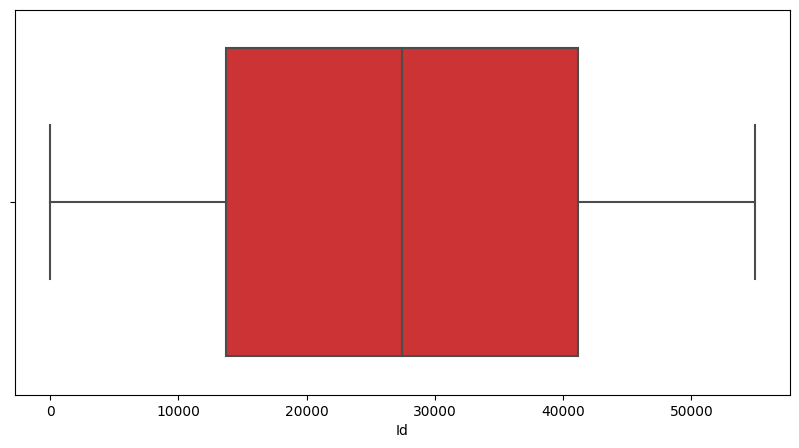

<Figure size 640x480 with 0 Axes>

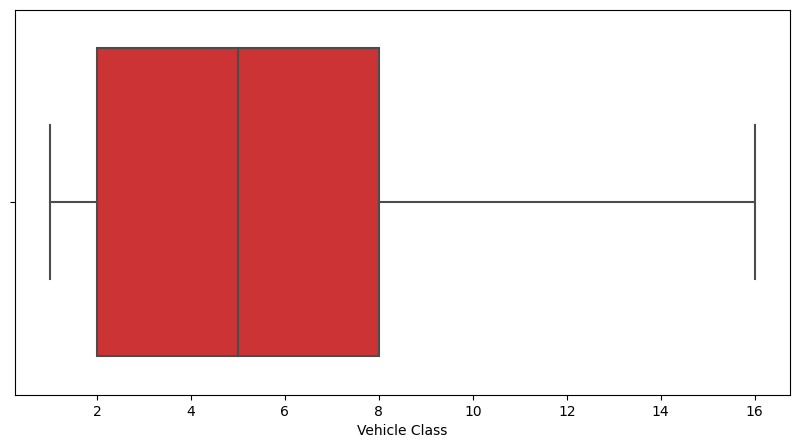

<Figure size 640x480 with 0 Axes>

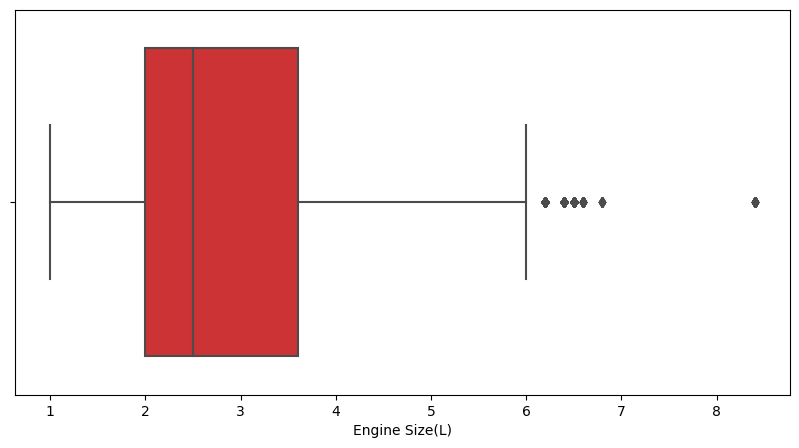

<Figure size 640x480 with 0 Axes>

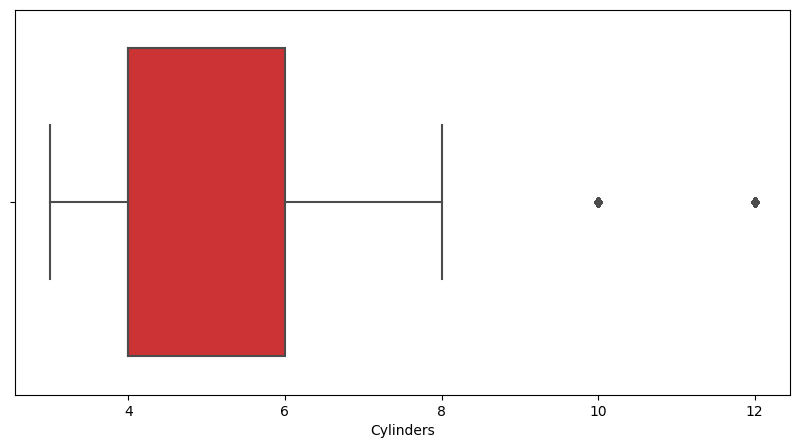

<Figure size 640x480 with 0 Axes>

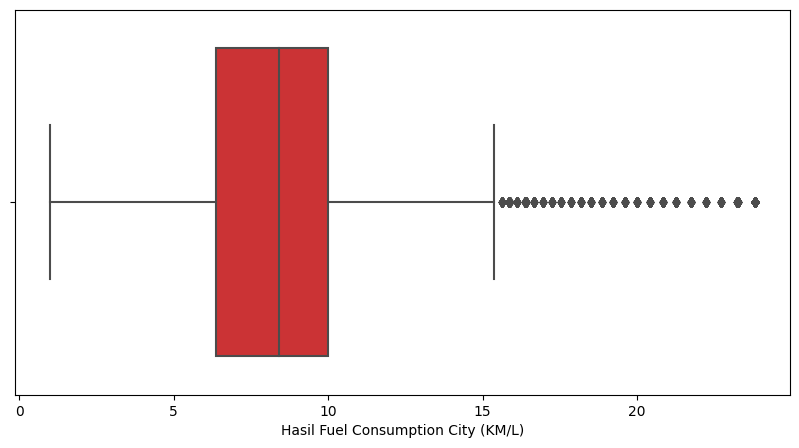

<Figure size 640x480 with 0 Axes>

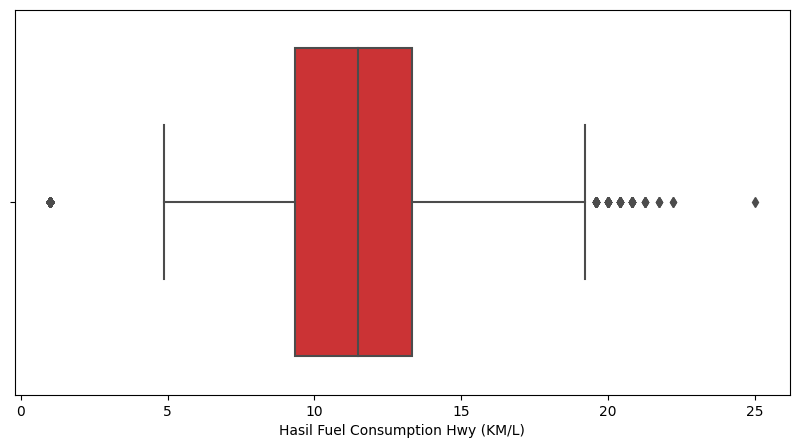

<Figure size 640x480 with 0 Axes>

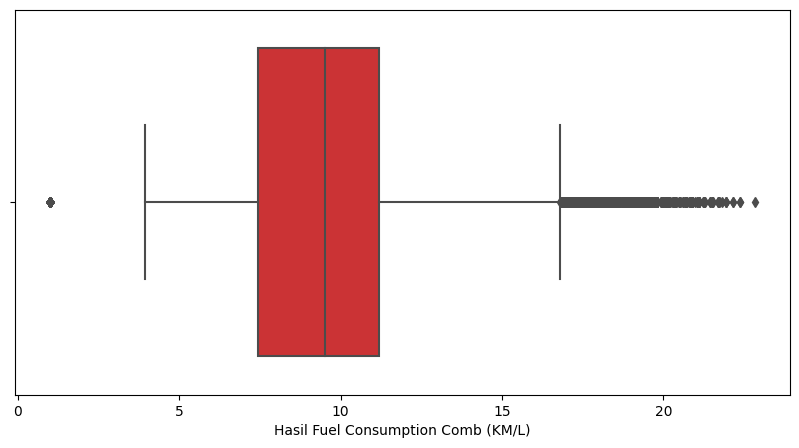

<Figure size 640x480 with 0 Axes>

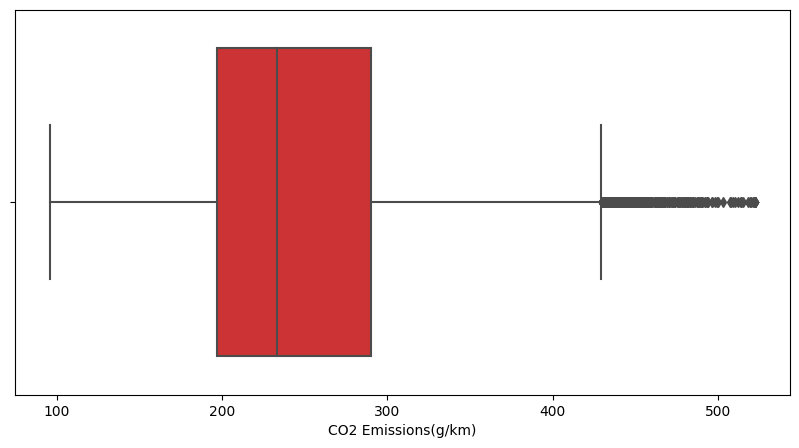

<Figure size 640x480 with 0 Axes>

In [ ]:
#Cek data outlier
num_feat = ['Id', 'Vehicle Class', 'Engine Size(L)','Cylinders','Hasil Fuel Consumption City (KM/L)', 'Hasil Fuel Consumption Hwy (KM/L)','Hasil Fuel Consumption Comb (KM/L)', 'CO2 Emissions(g/km)']
cat_feat = ['Transmission', 'Fuel Type']

for num in num_feat :
  plt.figure(figsize = (10,5))
  sns.boxplot(data = df, x = num, palette = 'Set1')
  plt.figure()

Metode IQR (Interquartile Range) untuk menghapus outlier dari dataset dengan tahapan mulai dari menghitung nilai kuartil 1 (Q1) dan nilai kuartil 3 (Q3), kemudian menghitung Interquartile Range (IQR). Kemudian menetapkan batas untuk data yang dianggap "ekstrem" (jauh dari distribusi utama) menggunakan faktor 1,5 kali IQR. Terakhir, kode tersebut menyaring dan menyimpan data yang tidak termasuk dalam kategori outlier.

In [ ]:
#IQR Method | Menghapus outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

dataaa = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Menghapus data yang dianggap sebagai outlier berdasarkan visualisasi Boxplot

In [ ]:
df_data = dataaa[
    (dataaa['Hasil Fuel Consumption City (KM/L)'] != 1) &
    (dataaa['Hasil Fuel Consumption City (KM/L)'] <= 14.8) &
    (dataaa['Hasil Fuel Consumption Hwy (KM/L)'] <= 18) &
    (dataaa['Hasil Fuel Consumption Comb (KM/L)'] <= 16) &
    (dataaa['CO2 Emissions(g/km)'] <= 380)
]
df_data

Id     Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0          1    MITSU            1.0             1.5        4.0           1.0   
1          2   TOYOTI            2.0             4.0        6.0           2.0   
2          3  MATSUDA            3.0             2.0        4.0           3.0   
3          4    CHEVO            4.0             4.8        8.0           4.0   
4          5   TOYOTI            3.0             1.8        4.0           5.0   
...      ...      ...            ...             ...        ...           ...   
54927  54928   TOYOTI            6.0             3.5        6.0           8.0   
54929  54930    ASURA            1.0             3.5        6.0          13.0   
54930  54931    CHEVO            1.0             3.6        6.0           7.0   
54931  54932      KIO            7.0             1.6        4.0           5.0   
54933  54934    CHEVO           11.0             3.6        6.0           5.0   

       Fuel Type  CO2 Emissions(g/km)  Hasil Fuel Consumption City (KM/L)  \
0            1.0                  208                            8.400000   
1            1.0                  325                            7.250000   
2            1.0                  170                            9.800000   
3            1.0                  362                            5.780347   
4            1.0                  180                           12.345679   
...          ...                  ...                                 ...   
54927        1.0                  234                            4.761905   
54929        2.0                  258                            9.090909   
54930        1.0                  266                            8.266043   
54931        1.0                  202                           10.637122   
54933        1.0                  303                            4.761905   

       Hasil Fuel Consumption Hwy (KM/L)  Hasil Fuel Consumption Comb (KM/L)  
0                              13.888889                           10.204082  
1                              10.309278                            8.361204  
2                              13.700036                           11.243234  
3                               8.547009                            6.765900  
4                              12.659258                           12.484395  
...                                  ...                                 ...  
54927                           8.400000                            5.920000  
54929                          12.048603                           10.204082  
54930                          10.752688                            9.230000  
54931                          12.820513                           11.520000  
54933                           9.433962                            6.126336  

[40933 rows x 11 columns]

In [ ]:
df_data.describe()

Id  Vehicle Class  Engine Size(L)     Cylinders  \
count  40933.000000   40933.000000    40933.000000  40933.000000   
mean   27475.408326       5.142306        2.754934      5.086336   
std    15854.757801       3.731006        1.077840      1.383465   
min        1.000000       1.000000        1.000000      3.000000   
25%    13757.000000       1.000000        2.000000      4.000000   
50%    27505.000000       5.000000        2.500000      4.000000   
75%    41166.000000       8.000000        3.500000      6.000000   
max    54934.000000      16.000000        6.000000      8.000000   

       Transmission     Fuel Type  CO2 Emissions(g/km)  \
count  40933.000000  40933.000000         40933.000000   
mean       6.647106      1.364767           239.586813   
std        4.009424      0.580277            54.104207   
min        1.000000      1.000000            96.000000   
25%        3.000000      1.000000           199.000000   
50%        5.000000      1.000000           229.000000   
75%        8.000000      2.000000           275.000000   
max       18.000000      3.000000           380.000000   

       Hasil Fuel Consumption City (KM/L)  Hasil Fuel Consumption Hwy (KM/L)  \
count                        40933.000000                       40933.000000   
mean                             8.575089                          11.654870   
std                              2.073407                           2.352918   
min                              3.278689                           4.880000   
25%                              6.850018                          10.000000   
50%                              8.620690                          11.764706   
75%                             10.000000                          13.331870   
max                             14.710000                          17.860000   

       Hasil Fuel Consumption Comb (KM/L)  
count                        40933.000000  
mean                             9.662081  
std                              2.051772  
min                              3.968254  
25%                              7.990000  
50%                              9.795349  
75%                             11.193673  
max                             15.974441

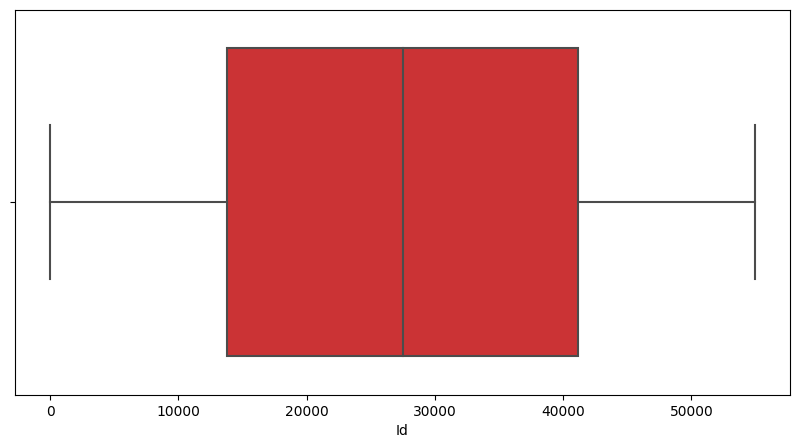

<Figure size 640x480 with 0 Axes>

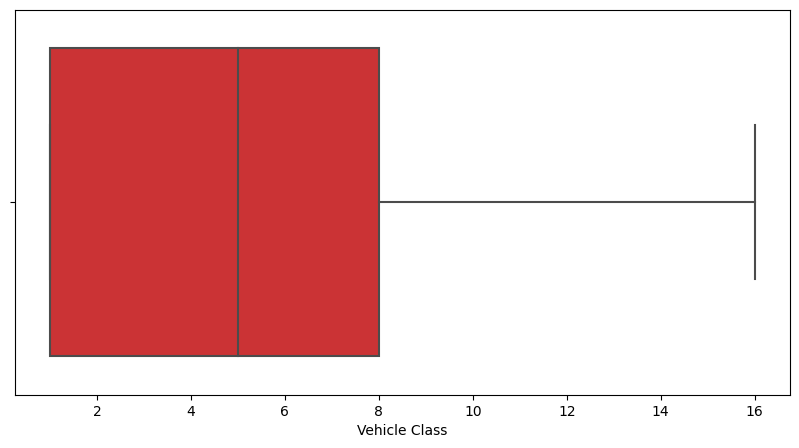

<Figure size 640x480 with 0 Axes>

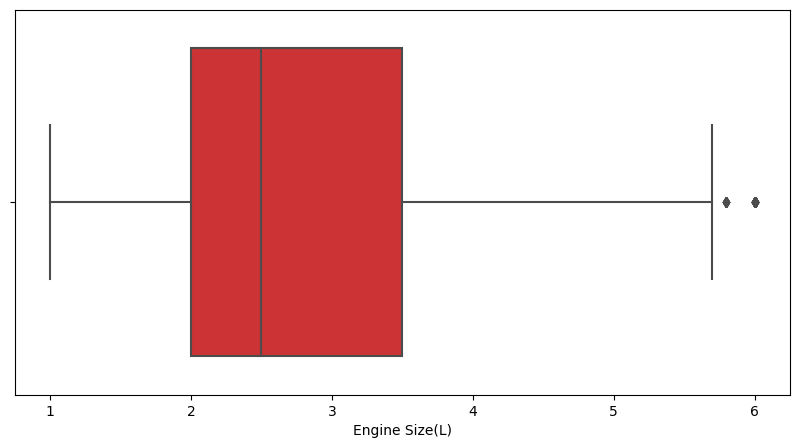

<Figure size 640x480 with 0 Axes>

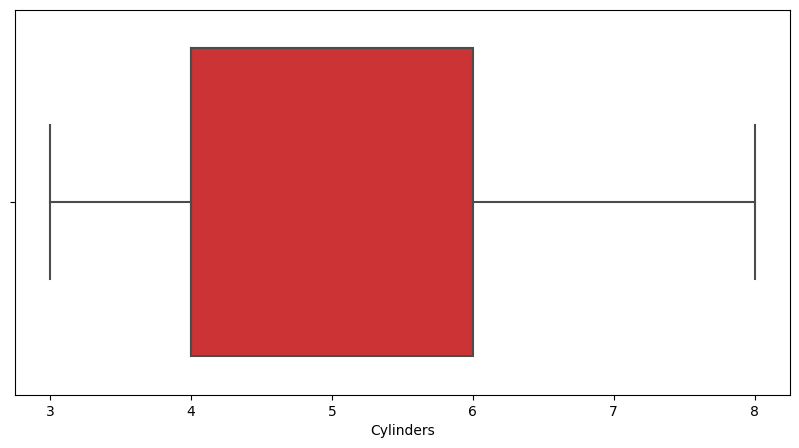

<Figure size 640x480 with 0 Axes>

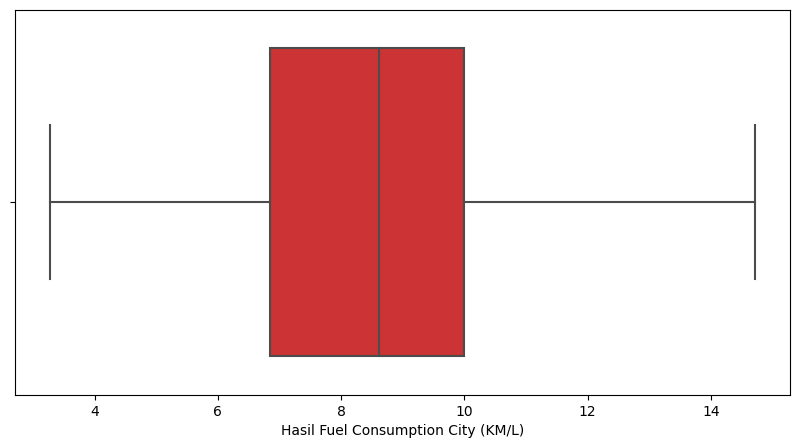

<Figure size 640x480 with 0 Axes>

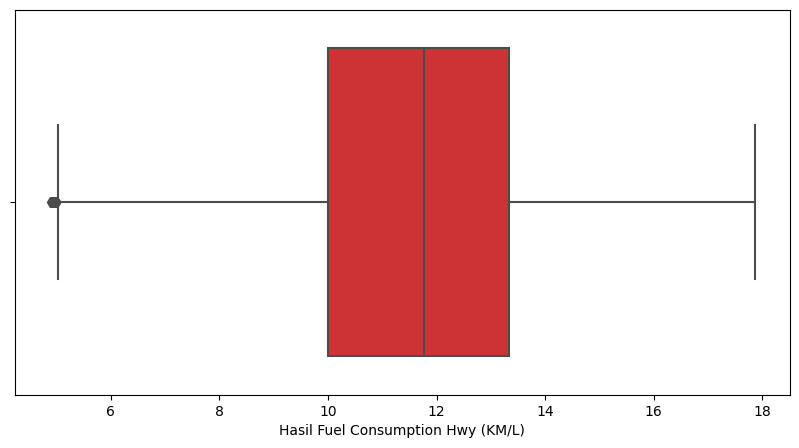

<Figure size 640x480 with 0 Axes>

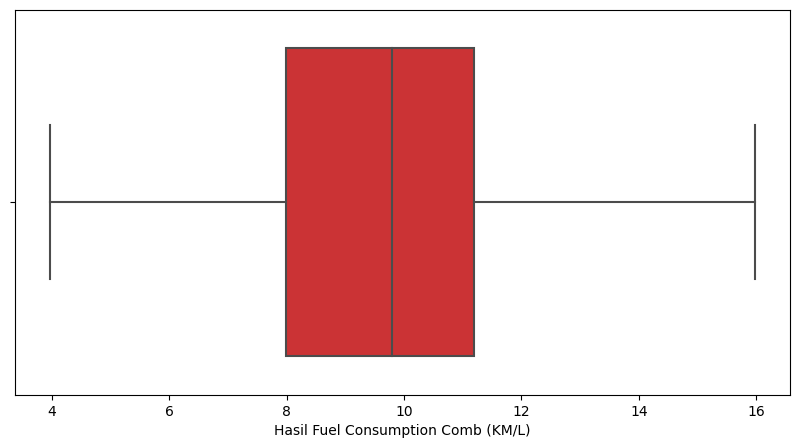

<Figure size 640x480 with 0 Axes>

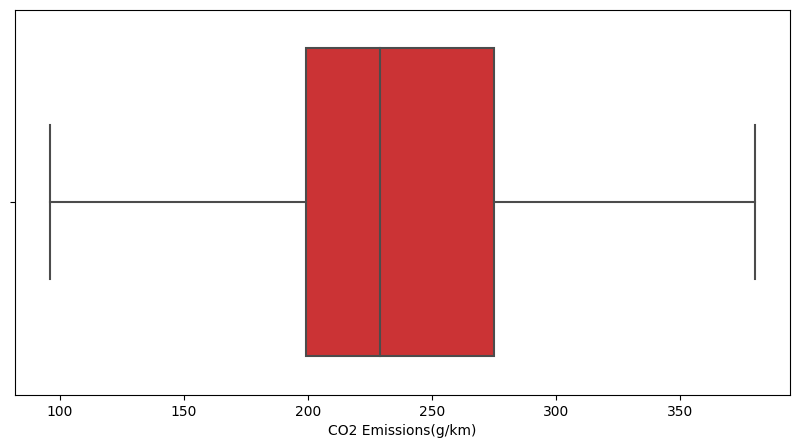

<Figure size 640x480 with 0 Axes>

In [ ]:
#Cek data outlier
num_feat = ['Id', 'Vehicle Class', 'Engine Size(L)','Cylinders','Hasil Fuel Consumption City (KM/L)', 'Hasil Fuel Consumption Hwy (KM/L)','Hasil Fuel Consumption Comb (KM/L)', 'CO2 Emissions(g/km)']
cat_feat = ['Transmission', 'Fuel Type']

for num in num_feat :
  plt.figure(figsize = (10,5))
  sns.boxplot(data = df_data, x = num, palette = 'Set1')
  plt.figure()

Cek dimensi atau ukuran dari data yang disimpan dalam variabel 'dataaa' setelah dilakukan penghapusan outlier.

In [ ]:
df_data.shape

(40933, 11)

##### Unvariate Analysis

Analisis fitur kategorikal dengan menghitung jumlah dan persentase sampel untuk setiap nilai unik, serta menampilkannya dalam bentuk tabel dan plot. Hal tersebut berguna untuk memahami distribusi data dan identifying potensi bias atau hubungan antar fitur.

      Jumlah sample  Persentase
3.0           10334        25.2
8.0            6426        15.7
5.0            5968        14.6
4.0            4061         9.9
9.0            2347         5.7
12.0           1662         4.1
6.0            1643         4.0
11.0           1348         3.3
7.0            1216         3.0
18.0           1012         2.5
16.0            898         2.2
2.0             836         2.0
15.0            780         1.9
10.0            747         1.8
1.0             597         1.5
13.0            582         1.4
17.0            358         0.9
14.0            118         0.3


<Axes: xlabel='Transmission', ylabel='count'>

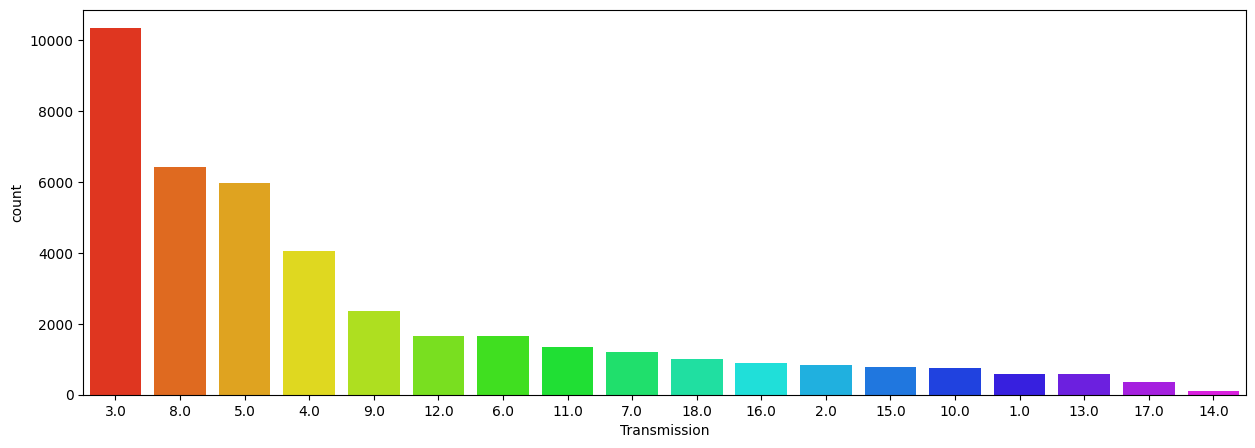

In [ ]:
feature = cat_feat[0]
count = df_data[feature].value_counts()

#Categorical
percent = 100 * df_data[feature].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
plt.figure(figsize = (15,5))
sns.countplot(x = feature, data = df_data, palette = 'gist_rainbow', order = df_data['Transmission'].value_counts().index)

Hitung jumlah dan persentase sampel untuk setiap kategori dalam kolom feature dari dataset 'dataaa'. Lalu, tampilkan hasil tersebut dalam tabel dan grafik untuk memudahkan visualisasi dan analisis distribusi data.

     Jumlah sample  Persentase
1.0          28151        68.8
2.0          10633        26.0
3.0           2149         5.3


<Axes: xlabel='Fuel Type', ylabel='count'>

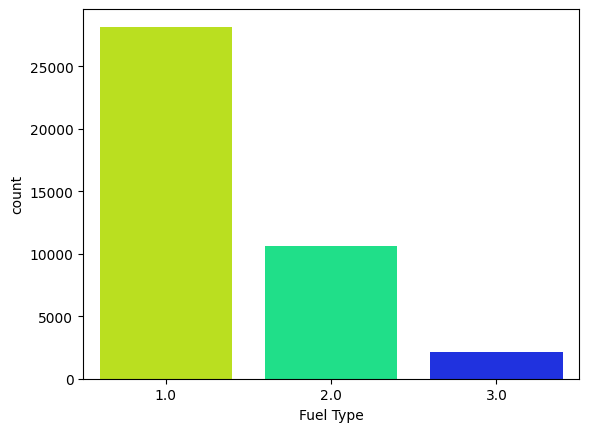

In [ ]:
feature = cat_feat[1]
count = df_data[feature].value_counts()
percent = 100 * df_data[feature].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(x = feature, data = df_data, palette = 'gist_rainbow', order = df_data['Fuel Type'].value_counts().index)

Bagi 'dataaa' menjadi 20 interval dengan fungsi hist(), kemudian fungsi tersebut akan menghitung frekuensi data yang jatuh pada setiap interval. Selanjutnya, fungsi hist() akan membuat grafik histogram berdasarkan frekuensi data. Grafik histogram akan ditampilkan dengan menggunakan fungsi show().

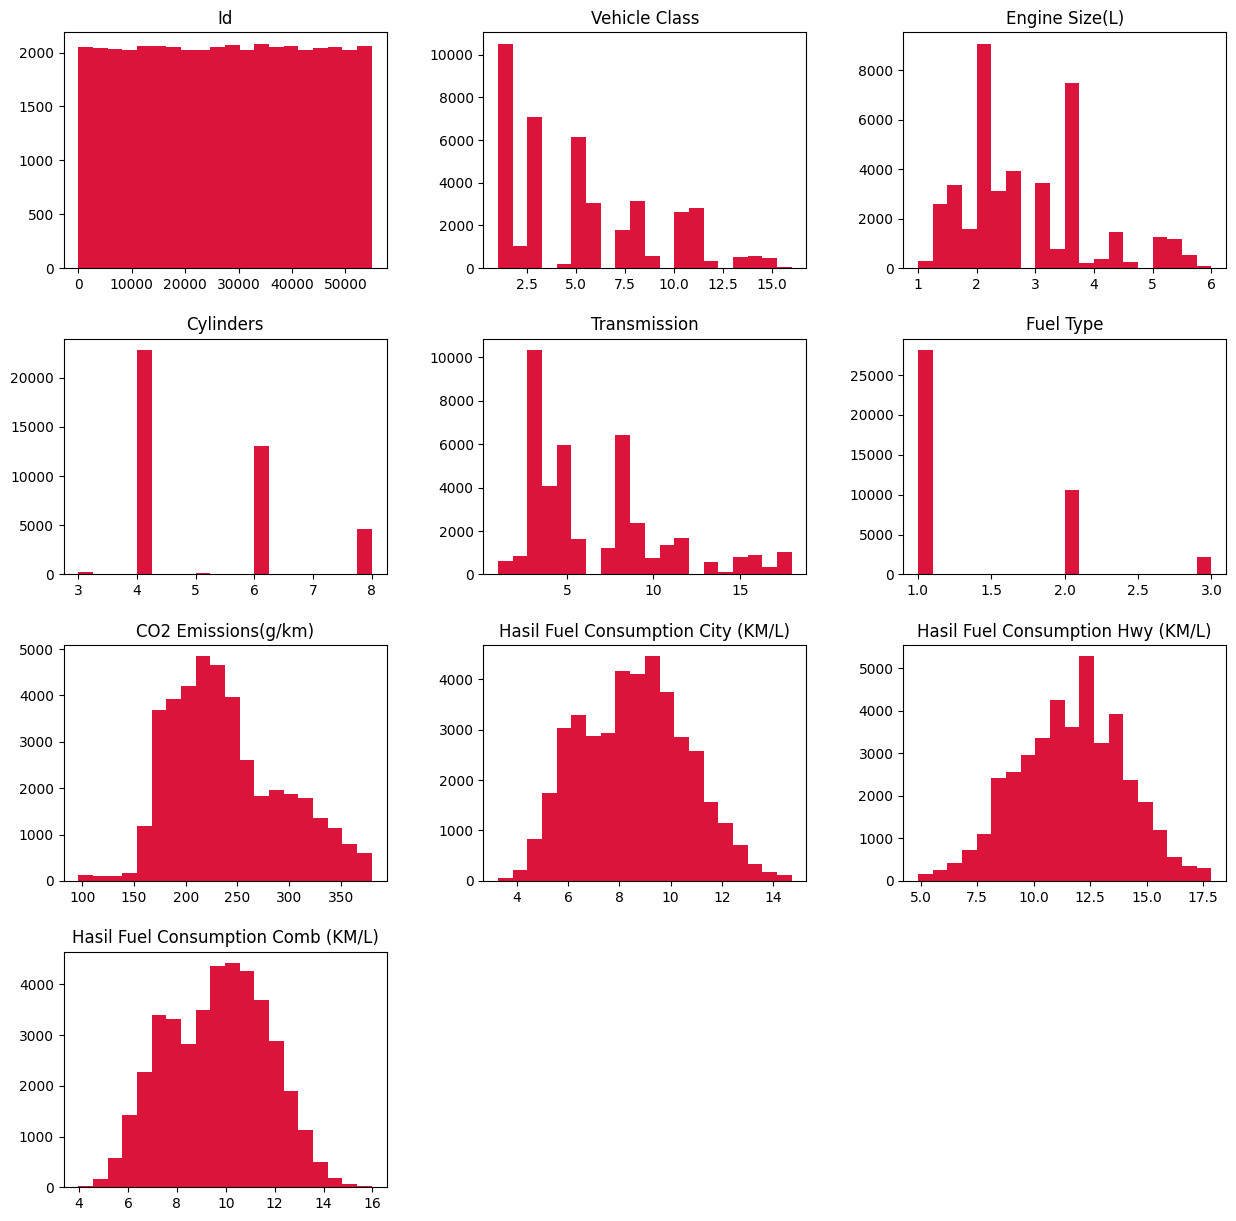

In [ ]:
#Numeric
df_data.hist(bins = 20, figsize = (15, 15), color = "crimson", grid = False)
plt.show()

##### Multivariative Analysis

Buat visualisasi data emisi CO2 berdasarkan berbagai fitur kategori yang ada di dataset. Untuk setiap fitur kategori, dibuat plot bar dengan menggunakan fungsi sns.catplot, yang mana plot bar tersebut menunjukan rata-rata emisi CO2 untuk kategori tersebut. Melalui plot bar tersebut membantu kita memahami hubungan antara fitur kategori dan emisi CO2.

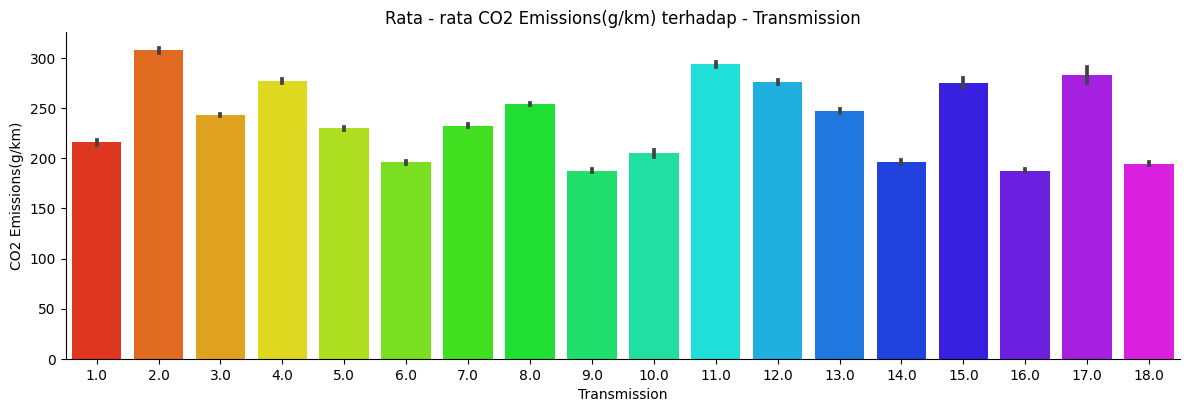

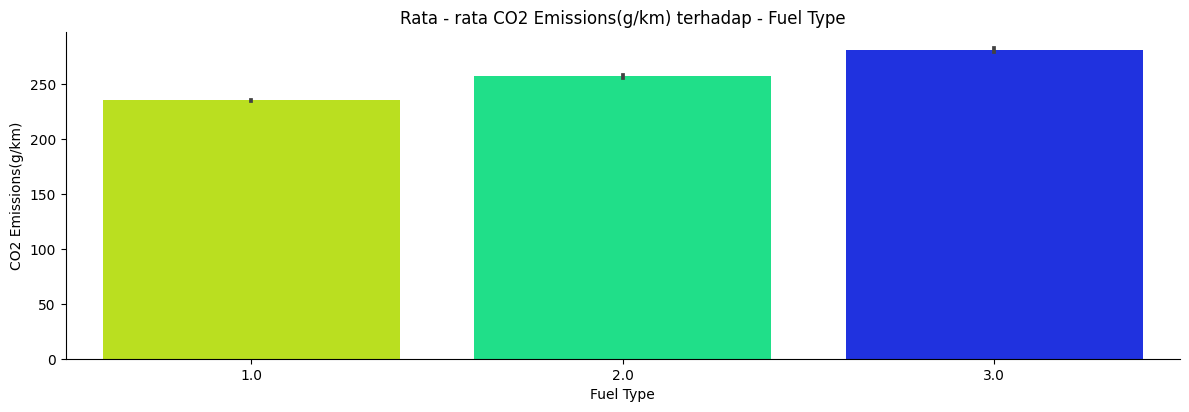

In [ ]:
#Categorical
categorical = df_data.select_dtypes(include = 'object').columns.to_list()

for col in cat_feat :
  sns.catplot(x = col, y = 'CO2 Emissions(g/km)', kind = 'bar', dodge = False, height = 4, aspect = 3, data = dataaa, palette = 'gist_rainbow')
  plt.title("Rata - rata CO2 Emissions(g/km) terhadap - {}".format(col))

Buat plot pasangan (pairplot) dari semua variabel numerik dalam dataset 'dataaa'. Plot pasangan adalah jenis visualisasi data yang menunjukkan hubungan antara dua variabel. Argumen diag_kind = 'kde' digunakan untuk menentukan jenis plot pada diagonal plot pasangan. Plot diagonal menunjukkan distribusi dari masing-masing variabel numerik. Dalam hal ini, plot diagonal menggunakan kernel density estimation (KDE) untuk menunjukkan distribusi data.

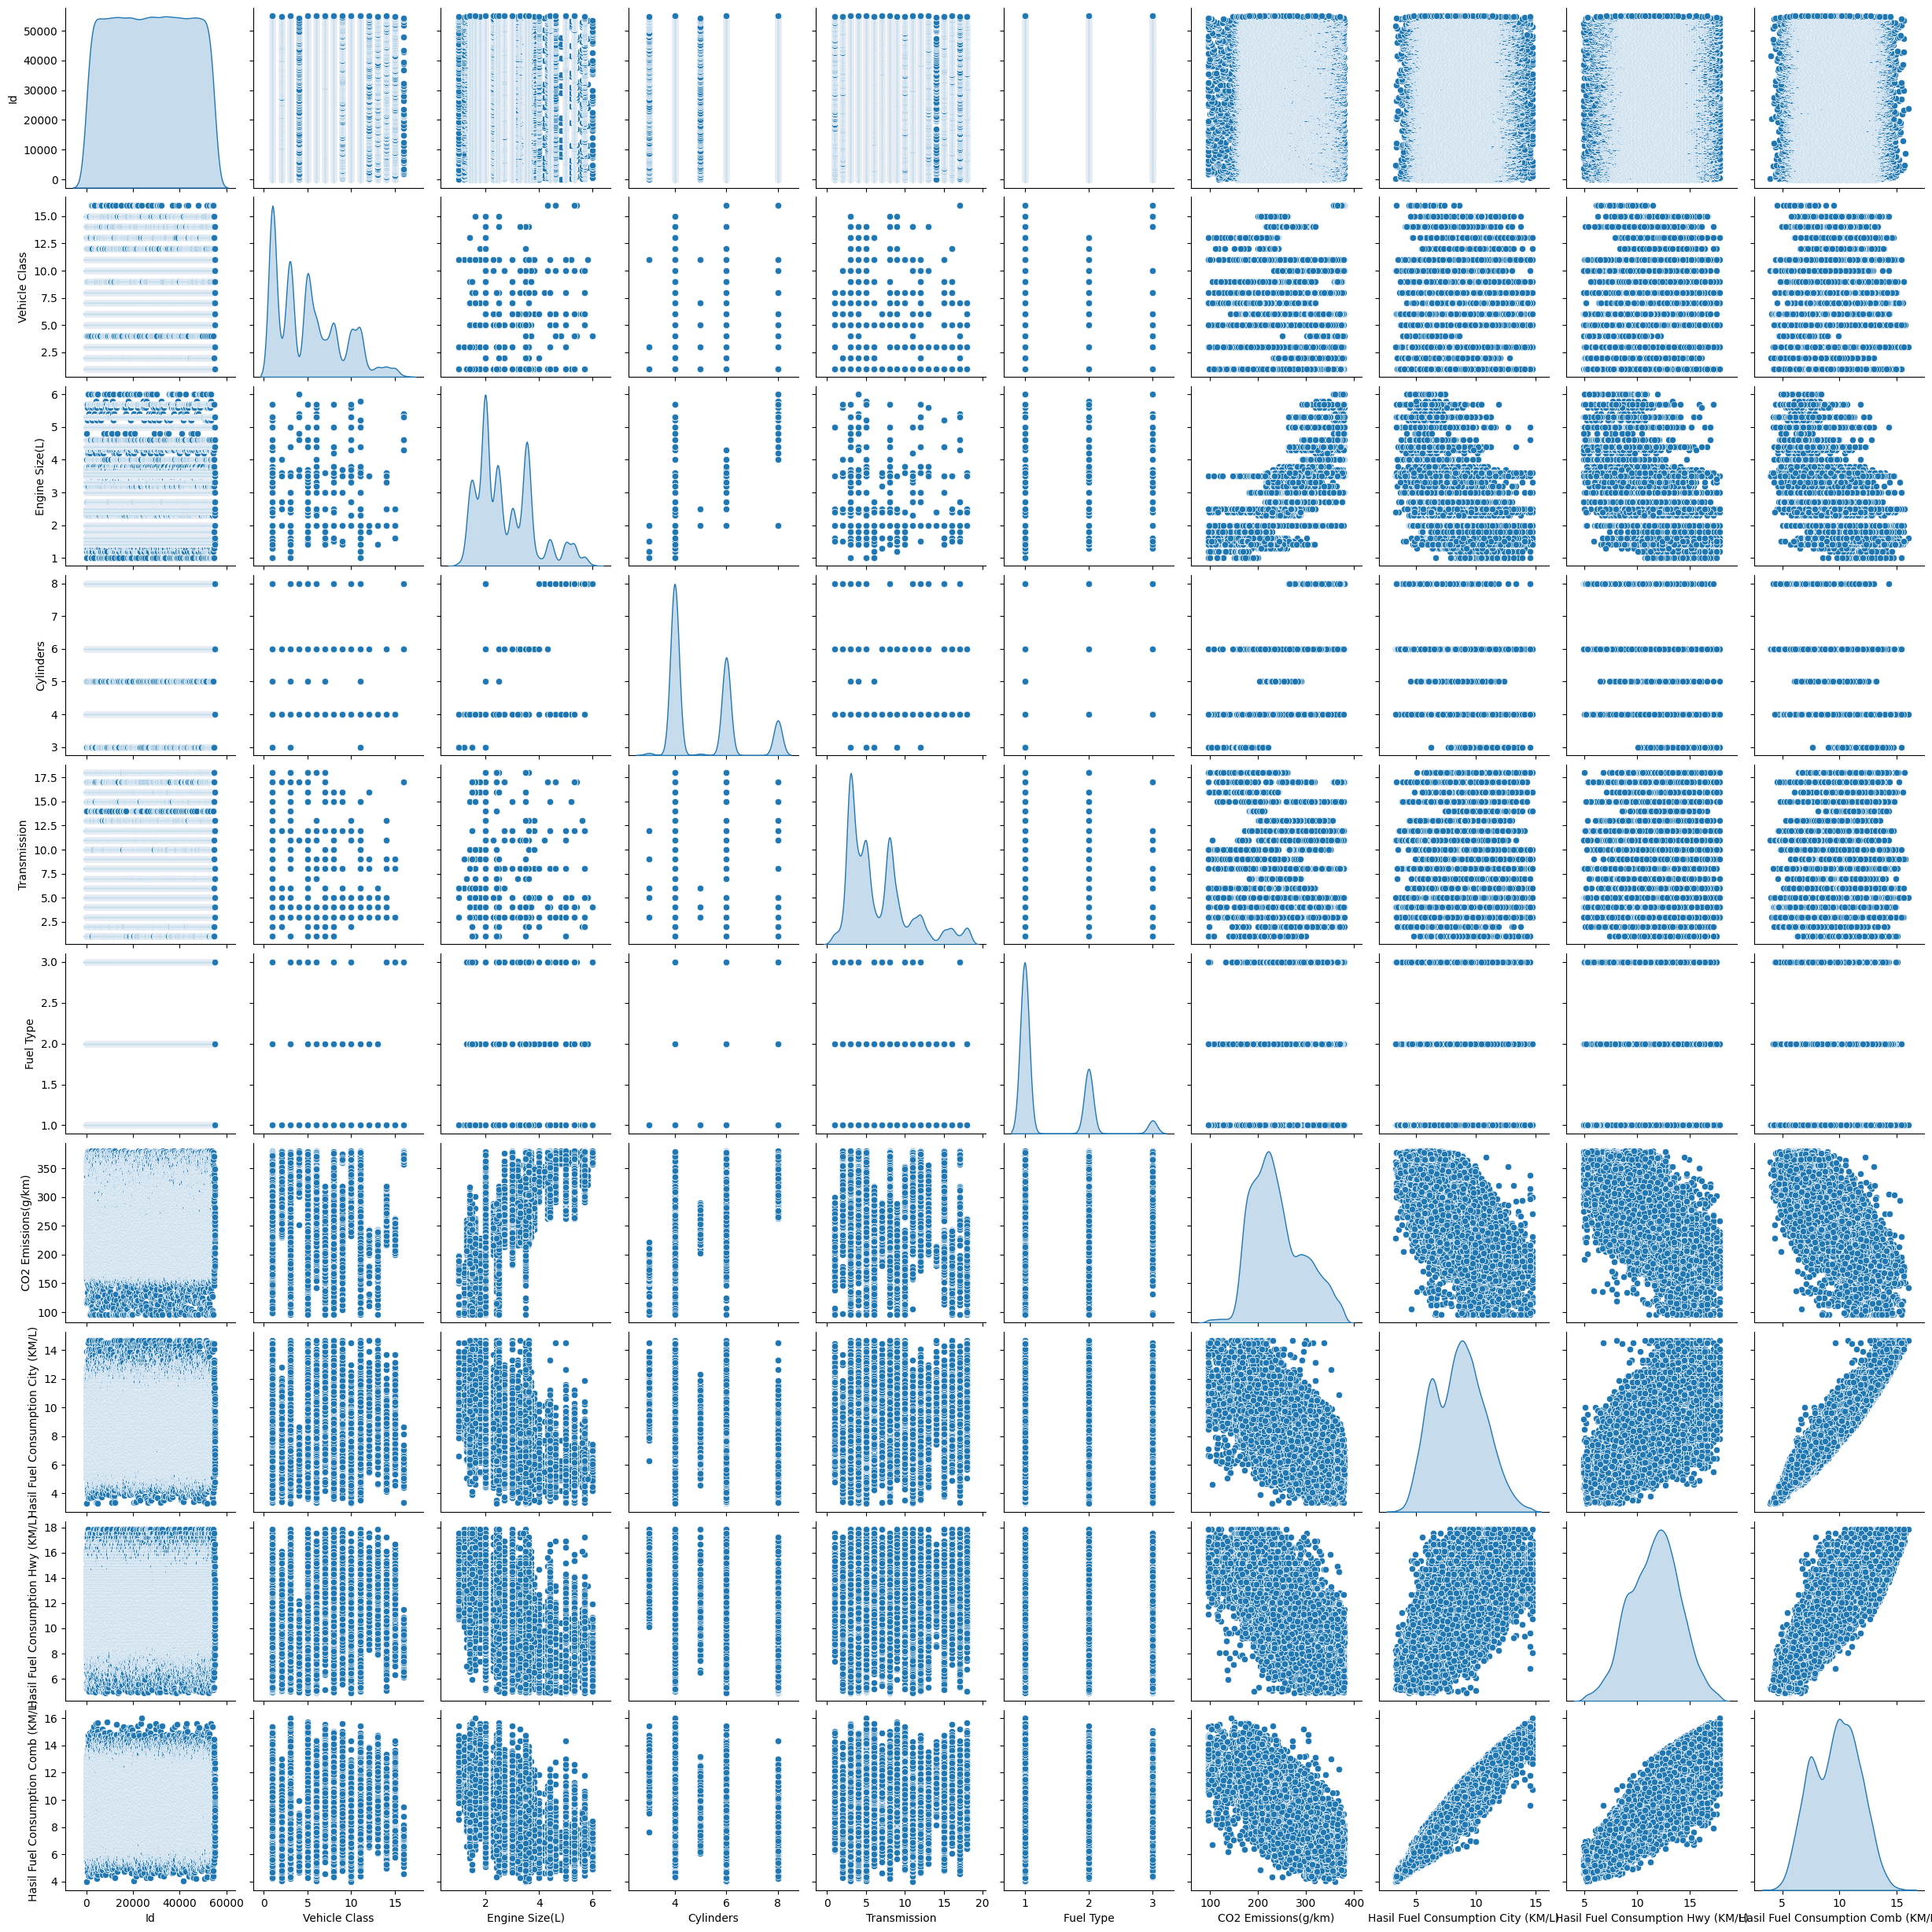

In [ ]:
#Numeric
sns.pairplot(df_data, diag_kind = 'kde')

Menampilkan matriks korelasi untuk fitur numerik dalam dataset 'dataaa'. Matriks korelasi menampilkan nilai koefisien korelasi Pearson antara semua fitur numerik. Nilai koefisien berkisar antara -1 dan 1:

- Nilai mendekati 1: Korelasi positif kuat, artinya saat satu fitur meningkat, fitur lain cenderung meningkat juga.
- Nilai mendekati -1: Korelasi negatif kuat, artinya saat satu fitur meningkat, fitur lain cenderung menurun.
- Nilai mendekati 0: Tidak ada korelasi linear, artinya tidak ada hubungan peningkatan atau penurunan yang jelas antara kedua fitur.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

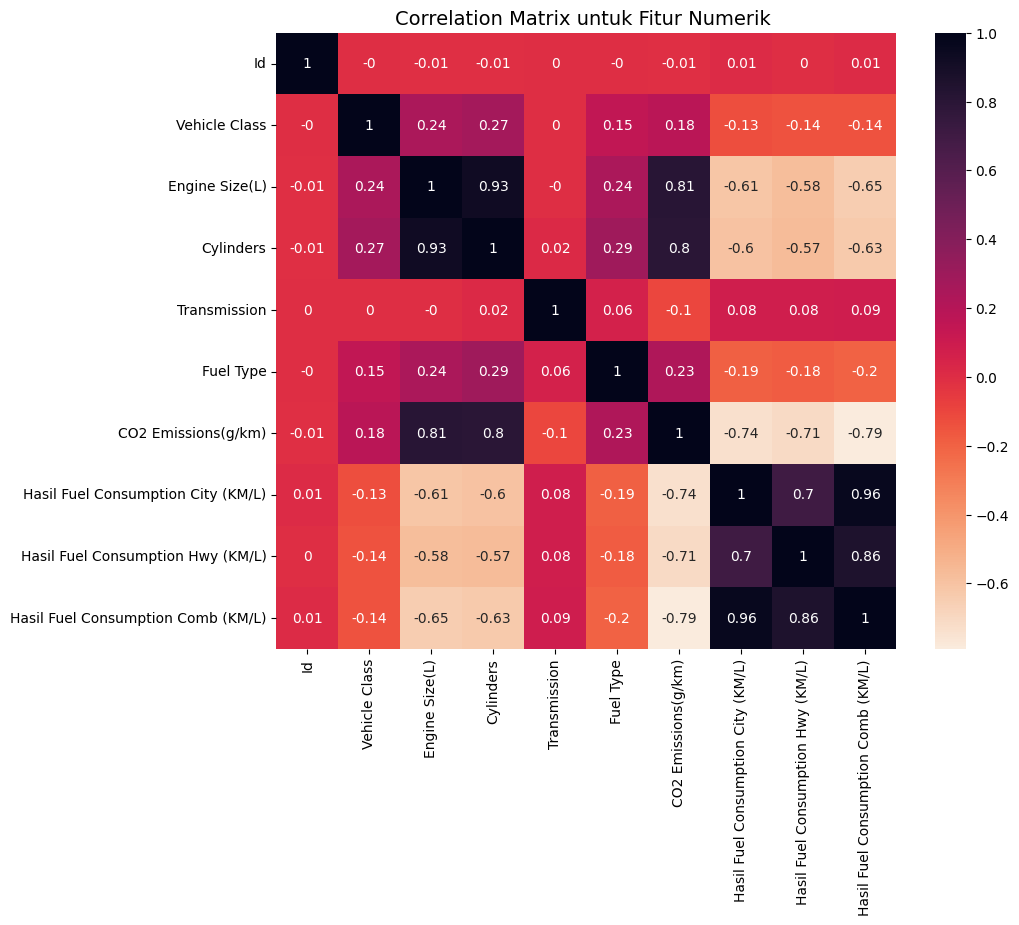

In [ ]:
#Skor korelasi
plt.figure(figsize = (10,8))
correlation_matrix = df_data.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Correlation Matrix untuk Fitur Numerik ", size = 14)

<a id='Split'></a>
## Creating Train and Test Dataset

Membuat Variable X dan y
*   Variable X : digunakan sebagai variabel independen dalam pemodelan. Column yang digunakan adalah 'Engine Size(L)', 'Cylinders', 'Fuel Type', 'Hasil Fuel Consumption City (KM/L)', 'Hasil Fuel Consumption Hwy (KM/L)', 'Hasil Fuel Consumption Comb (KM/L)'
*   Variable y :  digunakan sebagai variabel target (target variable) digunakan untuk evaluasi model. Column yang digunakan adalah 'CO2 Emissions(g/km)'.



In [ ]:
X = df_data[['Engine Size(L)','Cylinders', 'Transmission','Fuel Type','Hasil Fuel Consumption City (KM/L)', 'Hasil Fuel Consumption Hwy (KM/L)','Hasil Fuel Consumption Comb (KM/L)']]
y = df_data['CO2 Emissions(g/km)']

Membagi data Train menjadi train dan test dengan perbandingan 80% train dan 20% test menggunakan library sklearn train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

<a id='Model'></a>
## Model Development

Membuat model RandomForestRegressor, RandomForestRegressor adalah salah satu algoritma dalam machine learning yang termasuk dalam kategori ensemble learning. Ini adalah versi regresi dari algoritma Random Forest, yang bekerja dengan menggabungkan beberapa pohon keputusan (decision trees) untuk melakukan prediksi regresi.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)

RandomForestRegressor()

Memprediksi data test hasil split data

In [ ]:
#Prediction of test set
y_pred_rf= forest_model.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_rf))

Prediction for test set: [218.69 231.23 179.6  ... 216.26 163.22 165.06]


Membandingkan label aktual dengan hasil prediksi

In [ ]:
#Actual value and the predicted value
rf_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rf})
rf_diff.head()

Actual value  Predicted value
36366           203           218.69
35364           263           231.23
52330           162           179.60
15774           355           325.63
32952           292           289.54

<a id='Eval'></a>
## Evaluation Model

Evaluasi Model menggunakan:
*   R-Squared
*   Mean Absolute Error (MAE)
*   Mean Square Error (MSE)
*   Root Mean Square Error (RMSE)


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rf)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rf)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print('R squared: {:.2f}'.format(forest_model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 94.96
Mean Absolute Error: 16.13627308974158
Mean Square Error: 473.97467895961194
Root Mean Square Error: 21.770959532358972


Melakukan Cross-validation menggunakan 5-fold

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Menghitung RMSE dari nilai-nilai MSE pada setiap fold
rmse_scores = np.sqrt(-scores)

# Hitung R-squared, MAE, MSE, dan RMSE untuk setiap fold
r_squared = cross_val_score(forest_model, X, y, cv=5)
mae = -cross_val_score(forest_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mse = -cross_val_score(forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
root_mse = np.sqrt(mse)

for i in range(5):
    print(f"Fold-{i+1}:")
    print('R-squared:', r_squared[i])
    print('Mean Absolute Error (MAE):', mae[i])
    print('Mean Square Error (MSE):', mse[i])
    print('Root Mean Square Error (RMSE):', root_mse[i])
    print()


Fold-1:
R-squared: 0.8453543011447586
Mean Absolute Error (MAE): 15.908128652470719
Mean Square Error (MSE): 459.93252391310057
Root Mean Square Error (RMSE): 21.446037487449765

Fold-2:
R-squared: 0.8388713476103532
Mean Absolute Error (MAE): 16.337489350131158
Mean Square Error (MSE): 482.80969067949235
Root Mean Square Error (RMSE): 21.97293086230174

Fold-3:
R-squared: 0.8380119539143414
Mean Absolute Error (MAE): 16.14007407795169
Mean Square Error (MSE): 465.46981672435305
Root Mean Square Error (RMSE): 21.57474951707095

Fold-4:
R-squared: 0.8381639645038549
Mean Absolute Error (MAE): 16.220996530080395
Mean Square Error (MSE): 470.0436437951508
Root Mean Square Error (RMSE): 21.680489934389186

Fold-5:
R-squared: 0.8368166867298561
Mean Absolute Error (MAE): 16.03207978633672
Mean Square Error (MSE): 472.3215896481562
Root Mean Square Error (RMSE): 21.73296090384732



Menampilkan rata-rata dari hasil evaluasi:
*   R-Squared
*   Mean Absolute Error (MAE)
*   Mean Square Error (MSE)
*   Root Mean Square Error (RMSE)


In [ ]:
print('R-squared:', r_squared.mean())
print('Mean Absolute Error (MAE):', mae.mean())
print('Mean Square Error (MSE):', mse.mean())
print('Root Mean Square Error (RMSE):', root_mse.mean())

R-squared: 0.8394436507806329
Mean Absolute Error (MAE): 16.12775367939414
Mean Square Error (MSE): 470.1154529520506
Root Mean Square Error (RMSE): 21.681433741011794


Menghitung Mean Absolute Percentage Error(MAPE)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, forest_model.predict(X_test))
print('Mean Absolute Percentage Error(MAPE):',mape*100)

Mean Absolute Percentage Error(MAPE): 7.051915582368783


<a id='Predict'></a>
## Prediction with new data Test

Setelah melakukan tahap permodelan dan tahap evaluasi model, tahap selanjutnya adalah Prediksi menggunakan data Test baru yang tidak diketahui CO2 Emissions(g/km). Data test baru sudah dilakukan tahap preprocessing sebelumnya.

In [ ]:
df_test = pd.read_csv('Preprocess_Test_Bebasdehhh.csv')
df_test.head(5)

Id    Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0  54938    FOLD           10.0             5.0        8.0          11.0   
1  54939     BMV            3.0             2.0        4.0          12.0   
2  54940    JIPU            1.0             1.3        4.0           7.0   
3  54941   LECUS            1.0             1.4        4.0           3.0   
4  54942  BARUSU            3.0             2.0        4.0           5.0   

   Fuel Type  Hasil Fuel Consumption City (KM/L)  \
0        1.0                            7.042254   
1        2.0                           10.989011   
2        1.0                            9.802429   
3        2.0                            1.000000   
4        2.0                           11.360000   

   Hasil Fuel Consumption Hwy (KM/L)  Hasil Fuel Consumption Comb (KM/L)  
0                           6.578947                            6.827825  
1                          15.385106                           12.609794  
2                          12.820513                           10.964912  
3                          11.236576                            1.000000  
4                          14.085903                           12.437811

Membuat Variable test untuk prediksi.

In [ ]:
test = df_test[['Engine Size(L)','Cylinders', 'Transmission','Fuel Type','Hasil Fuel Consumption City (KM/L)', 'Hasil Fuel Consumption Hwy (KM/L)','Hasil Fuel Consumption Comb (KM/L)']]


Prediksi data test baru menggunakan model yang sudah dibuat sebelumnya

In [ ]:
#Prediction of test set
y_pred_test_rf = forest_model.predict(test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_test_rf))

Prediction for test set: [330.77 206.71 221.   ... 205.91 223.94 332.25]


Mengabungkan data hasil prediksi kedalam data test baru dalam bentuk Dataframe.

In [ ]:
#Predicted value
rf_diff_test = pd.DataFrame({'Predicted value': y_pred_test_rf})
df_test['Predicted CO2 Emissions(g/km)'] = rf_diff_test
df_test

Id    Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0      54938    FOLD           10.0             5.0        8.0          11.0   
1      54939     BMV            3.0             2.0        4.0          12.0   
2      54940    JIPU            1.0             1.3        4.0           7.0   
3      54941   LECUS            1.0             1.4        4.0           3.0   
4      54942  BARUSU            3.0             2.0        4.0           5.0   
...      ...     ...            ...             ...        ...           ...   
23540  78478   MITSU            1.0             2.0        4.0           6.0   
23541  78479   CHEVO            3.0             1.4        4.0           5.0   
23542  78480     KIO            1.0             1.4        4.0           3.0   
23543  78481    JIPU            1.0             2.4        4.0           7.0   
23544  78482   CHEVO            6.0             5.3        8.0           4.0   

       Fuel Type  Hasil Fuel Consumption City (KM/L)  \
0            1.0                            7.042254   
1            2.0                           10.989011   
2            1.0                            9.802429   
3            2.0                            1.000000   
4            2.0                           11.360000   
...          ...                                 ...   
23540        1.0                            1.000000   
23541        1.0                           11.495914   
23542        1.0                            8.620690   
23543        1.0                            9.520000   
23544        1.0                            8.064516   

       Hasil Fuel Consumption Hwy (KM/L)  Hasil Fuel Consumption Comb (KM/L)  \
0                               6.578947                            6.827825   
1                              15.385106                           12.609794   
2                              12.820513                           10.964912   
3                              11.236576                            1.000000   
4                              14.085903                           12.437811   
...                                  ...                                 ...   
23540                          13.330000                           11.135857   
23541                          18.180000                           13.698630   
23542                          11.904762                            9.840000   
23543                          11.904762                           10.416667   
23544                           8.928040                            1.000000   

       Predicted CO2 Emissions(g/km)  
0                             330.77  
1                             206.71  
2                             221.00  
3                             241.81  
4                             203.01  
...                              ...  
23540                         183.97  
23541                         187.54  
23542                         205.91  
23543                         223.94  
23544                         332.25  

[23545 rows x 11 columns]

In [ ]:
hasil = df_test[['Id', 'Predicted CO2 Emissions(g/km)']]
hasil.to_csv('Hasil_Bebasdehhh.csv', index=False)

In [ ]:
hasil

Id  Predicted CO2 Emissions(g/km)
0      54938                         330.77
1      54939                         206.71
2      54940                         221.00
3      54941                         241.81
4      54942                         203.01
...      ...                            ...
23540  78478                         183.97
23541  78479                         187.54
23542  78480                         205.91
23543  78481                         223.94
23544  78482                         332.25

[23545 rows x 2 columns]

Mencari merk mobil yang memiliki Emisi CO2 tertinggi

In [ ]:
# Melakukan sorting berdasarkan kolom Predicted CO2 Emissions(g/km) dari yang tertinggi
sorted_data = df_test.sort_values(by='Predicted CO2 Emissions(g/km)', ascending=False)

# Mengambil merek mobil dengan emisi tertinggi beserta nilai emisinya
highest_emission = sorted_data.iloc[0]['Predicted CO2 Emissions(g/km)']
highest_emission_make = sorted_data.iloc[0]['Make']

# Mengambil merek mobil dengan emisi terendah beserta nilai emisinya
lowest_emission = sorted_data.iloc[-1]['Predicted CO2 Emissions(g/km)']
lowest_emission_make = sorted_data.iloc[-1]['Make']

print("Merek mobil dengan emisi tertinggi:", highest_emission_make)
print("Nilai emisi tertinggi:", highest_emission)

print("\nMerek mobil dengan emisi terendah:", lowest_emission_make)
print("Nilai emisi terendah:", lowest_emission)


# Mengurutkan seluruh data berdasarkan kolom Make dari terbesar ke terkecil
sorted_by_make = df_test.sort_values(by='Make', ascending=False)
print("\nData yang diurutkan berdasarkan Make dari terbesar ke terkecil:")
sorted_by_make


Merek mobil dengan emisi tertinggi: CHEVO
Nilai emisi tertinggi: 376.88

Merek mobil dengan emisi terendah: GONDA
Nilai emisi terendah: 120.29

Data yang diurutkan berdasarkan Make dari terbesar ke terkecil:


Id    Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
19719  74657  TOYOTI           10.0             4.6        8.0           3.0   
12874  67812  TOYOTI            6.0             2.5        4.0           9.0   
16051  70989  TOYOTI            5.0             3.5        6.0           8.0   
17482  72420  TOYOTI            6.0             5.7        8.0           3.0   
22974  77912  TOYOTI            5.0             3.5        6.0           3.0   
...      ...     ...            ...             ...        ...           ...   
13410  68348   ASURA            3.0             2.0        4.0          20.0   
4618   59556   ASURA            3.0             1.5        4.0          16.0   
680    55618   ASURA            3.0             2.0        4.0          20.0   
7647   62585   ASURA            3.0             2.4        4.0          14.0   
635    55573   ASURA            3.0             3.5        6.0          13.0   

       Fuel Type  Hasil Fuel Consumption City (KM/L)  \
19719        1.0                            5.780347   
12874        1.0                           12.820000   
16051        1.0                            9.090000   
17482        1.0                            7.250000   
22974        1.0                            5.380000   
...          ...                                 ...   
13410        2.0                           12.193152   
4618         2.0                            9.523243   
680          1.0                           12.499956   
7647         2.0                            8.849558   
635          2.0                            8.621936   

       Hasil Fuel Consumption Hwy (KM/L)  Hasil Fuel Consumption Comb (KM/L)  \
19719                           4.975124                            5.387931   
12874                          15.625000                           13.947001   
16051                          12.987013                           10.509579   
17482                           8.771930                            7.861635   
22974                          13.888889                            7.420000   
...                                  ...                                 ...   
13410                          14.085903                           12.980000   
4618                           13.510000                           10.976948   
680                            12.350000                           12.429155   
7647                           14.285714                           10.672359   
635                             1.000000                            9.630000   

       Predicted CO2 Emissions(g/km)  
19719                         348.73  
12874                         164.80  
16051                         227.66  
17482                         355.77  
22974                         315.34  
...                              ...  
13410                         205.51  
4618                          178.19  
680                           180.84  
7647                          190.94  
635                           255.07  

[23545 rows x 11 columns]

Melakukan sorting terhadap merk mobil yang memiliki rata rata Emisi CO2 tertinggi

In [ ]:
# Melakukan sorting berdasarkan kolom CO2 Emissions(g/km) dari yang tertinggi
sorted_data = df_test.sort_values(by='Predicted CO2 Emissions(g/km)', ascending=False)

# Menghitung rata-rata emisi untuk setiap merek mobil
average_emissions = sorted_data.groupby('Make')['Predicted CO2 Emissions(g/km)'].mean()

# Mengambil kolom Make dari data yang diurutkan berdasarkan emisi tertinggi
sorted_makes = sorted_data['Make']

# Menghilangkan duplikat dan mengurutkan merek mobil dari terbesar ke terkecil
unique_sorted_makes = sorted_makes.drop_duplicates().sort_values(ascending=False)

# Membuat DataFrame baru untuk menyimpan rata-rata emisi
average_emissions_df = pd.DataFrame({'Make': unique_sorted_makes})
average_emissions_df['Average Emissions'] = average_emissions_df['Make'].map(average_emissions)

sorted_average_emissions = average_emissions_df.sort_values(by='Average Emissions', ascending=False)

print("Data dengan rata-rata emisi CO2 tertinggi ke terendah:")
sorted_average_emissions

Data dengan rata-rata emisi CO2 tertinggi ke terendah:


Make  Average Emissions
17720       LAMBOGI         366.338856
12820          DOGE         290.235904
18741  LAND CRAWLER         281.807290
5961       CADILUXE         273.365411
8786          CHEVO         272.295470
11974           BMV         263.330782
7311           FOLD         263.232609
10700         LECUS         247.591246
7491           JIPU         247.141045
19223        TOYOTI         238.021048
18217        NIRRAN         237.160186
1936          ASURA         229.815434
4758          TOLVO         229.769940
11868           KIO         216.759510
13650        BARUSU         213.930527
6928        RYUNDAI         212.956284
16825       FOLKSWA         208.413580
8419        MATSUDA         201.478978
23021         MITSU         199.548821
15105         GONDA         197.467431
20286          FIAR         191.357089

<a id='cc'></a>
## Conclusion

Dari hasil tersebut, dapat disimpulkan bahwa :

- Berdasarkan sorting data Prediksi Emisi CO2, Chevo menjadi merk mobil yang memiliki emisi tertinggi yaitu sebesar 376.88.
- Berdasarkan hasil rata-rata, merk mobil dengan rata rata emisi tertinggi adalah Lambogi, dengan rata-rata emisi sebesar 366,338856 gram per kilometer. Selanjutnya diikuti oleh Doge dengan rata-rata emisi sebesar 290,235904 gram per kilometer. Kedua mobil ini merupakan mobil sport mewah yang memiliki mesin besar dan bertenaga tinggi. Mesin-mesin ini membutuhkan lebih banyak bahan bakar untuk beroperasi, sehingga menghasilkan lebih banyak emisi.

Salah satu cara paling efektif untuk mengurangi emisi CO2 adalah dengan meningkatkan efisiensi kendaraan. Hal ini dapat dilakukan dengan beberapa cara, antara lain:
* Menggunakan kendaraan yang menghasilkan emisi CO2 terendah seperti GONDA.
* Melakukan perawatan kendaraan secara rutin untuk menjaga performa mesin.
* Mengemudi dengan cara yang hemat bahan bakar, seperti mengemudi dengan kecepatan konstan dan menghindari pengereman dan akselerasi yang mendadak.


Cara lain untuk mengurangi emisi CO2 adalah dengan mengurangi ketergantungan pada kendaraan pribadi. Hal ini dapat dilakukan dengan beberapa cara, antara lain:
* Menggunakan transportasi umum, bersepeda, atau berjalan kaki untuk jarak yang dekat.
* Berbagi kendaraan dengan orang lain.
* Meningkatkan kualitas dan aksesibilitas transportasi umum.


Berikut adalah beberapa kebijakan yang dapat diimplementasikan untuk mendukung solusi dan strategi di atas:

*   Pemerintah dapat melakukan pengecekan kendaraan secara rutin, dengan memprioritaskan kendaraan yang menghasilkan emisi CO2 tinggi seperti Chevo dll.
*   Pemerintah dapat memberikan subsidi untuk pembelian kendaraan hemat bahan bakar dan transportasi umum.
*   Pemerintah dapat memberlakukan pajak yang lebih tinggi untuk kendaraan dengan emisi tinggi.
*   Pemerintah dapat mengembangkan infrastruktur untuk mendukung transportasi umum, seperti jalur sepeda dan trotoar yang aman.


In [ ]:
import pickle

with open('Bebasdehh.pkl', 'wb') as r:
    pickle.dump(forest_model, r)
